# Data Science final year project : UEFA Champions League 2018-2019

<i>Cyril TSO and Tsiory RAZAFINDRAZAKA - Master 2 IoT & Big Data</i>

The goal of the project is to predict the winner of the UEFA Champions League 2018-2019 season.

In this notebook, only a part of the cleaning, the EDA and the Machine Learning part are gonna be displayed.

If you are looking for the Web Scraping and the Data Cleaning code, you can found them on my Github at this link : https://github.com/cyriltso/PFE-Data-Science

So, after having acquired the raw data from <i>ESPN, Whoscored and Footystats</i> and transformed them into a global dataset with Pandas, we're ready to analyse it and to find which Machine Learning is best suited for making the most accurate prediction regarding the winner of the UEFA Champions League.

## UEFA Champions League Prize List

Before diving into the notebook, it's good to know who were the previous winners, the best scorers and the best assist players of the competition from 2011 to 2018.

For the teams :

-  2011/2012 : Chelsea FC (England, 6th in national championship)
-  2012/2013 : Bayern Munich (Germany, 1st in national championship)
-  2013/2014 : Real Madrid (Spain, 3rd in national championship)
-  2014/2015 : FC Barcelona (Spain, 1st in national championship)
-  2015/2016 : Real Madrid (Spain, 2nd in national championship)
-  2016/2017 : Real Madrid (Spain, 1st in national championship)
-  2017/2018 : Real Madrid (Spain, 2nd in national championship)

For the scorers :

-  2011/2012 : Lionel Messi (FC Barcelona) ; 14 goals 
-  2012/2013 : Cristiano Ronaldo (Real Madrid) ; 12 goals 
-  2013/2014 : Cristiano Ronaldo (Real Madrid) ; 17 goals
-  2014/2015 : Cristiano Ronaldo (Real Madrid), Lionel Messi (FC Barcelona), Neymar (FC Barcelona) ; 10 goals 
-  2015/2016 : Cristiano Roanldo (Real Madrid) ; 16 goals
-  2016/2017 : Cristiano Ronaldo (Real Madrid) ; 12 goals
-  2017/2018 : Cristiano Ronaldo (Real Madrid) ; 15 goals

For the assist players :

-  2011/2012 : Kaka (Real Madrid) ; 5 assists
-  2012/2013 : Zlatan Ibrahimovic (Paris Saint-Germain) ; 7 assists
-  2013/2014 : Wayne Rooney (Manchester United) ; 8 assists
-  2014/2015 : Lionel Messi (FC Barcelona) ; 6 assists
-  2015/2016 : Kingsley Coman (Bayern Munich) ; 5 assists
-  2016/2017 : Neymar (FC Barcelona) ; 8 assists
-  2017/2018 : James Milner (Liverpool FC) ; 9 assists

##  Table of Contents

1. Content of the dataset <br>
2. Dataset's features glossary
3. Exploratory Data Analysis
4. Features Engineering <br>
5. Predictions <br>
6. Storytelling & Conclusion <br>

In [2]:
### Importing libraries and setting graphics grid default paremeters

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, log_loss
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

sns.set(style = "white", palette="Set3")

### Content of the dataset

The dataset is composed of 210 observations (from 2011 to 2018) and 42 features.

Overall, the dataframe can be distinguished in 4 global categories concatened together :
    - The teams' stats in each round of the competition (starting from the Round of 16, so only the 16 best teams does appear in this section)
    - The teams' detailed stats in the whole competition (all of the teams that have played in the competition appear there)
    - The best scorers' stats
    - The best assists players' stats

### Dataset's features glossary

    - YEAR : year of each season
    - ROUND : round of the competition (round of 16, quarter-finals, semi-finals, final)
    - RANK ER : rank of each team in each round of the competition
    - TEAM ER : name of each team in each round of the competition
    - MP : number of match played by each team in each round of the competition (2 per round and 1 in the final)
    - W : number of wins by each team in each round of the competition
    - D : number of draws by each team in each round of the competition
    - L : number of losses by each team in each round of the competition
    - GF : number of goals scored by each team in each round of the competition
    - GD : goals difference from each team in each round of the competition
    - Last 5 : last results
    - CS% : clean sheet percentage (number of matches with goals conceded
    - BTTS% : percentage of matches where both teams scored a goal
    - FTS% : percentage of matches where a team failed to score a goal
    - Over 1.5+ % : percentage of matches where a team scores more than 1.5 goals
    - Over 2.5+ % : percentage of matches where a team scores more than 2.5 goals
    - AVG : goal average of a team
    - CATEGORIES 1 : first category of the dataset (detailed stats here)
    - RANK DS : team rank with the detailed stats
    - TEAM DS : team name with the detailed stats
    - GOALS : number of goals scored in total during the whole competition 
    - SHOTS : shots attempts average
    - YELLOW CARD : number of yellow cards
    - RED CARD : number of red cards
    - POSSESSION : possession percentage
    - PASS% : pass accuracy percentage
    - RATING : team evaluation (created by the forecaster)
    - CATEGORIES 2 : second category of the dataset (scorers here)
    - RANK SC : scorers ranking
    - NAME SC : scorers names
    - TEAM SC : scorers teams
    - MP SC : matches played by the scorers
    - G : number of goals scored by the scorers
    - GOALS RATIO : goals ratio
    - CATEGORIES 3 : third category of the dataset (assists players here)
    - RANK A : assists players ranking
    - NAME A : assists players names
    - TEAM A : assists players teams
    - MP A : matches played by the assists players
    - A : number of assists
    - ASSISTS RATiO : assists ratio
    
    - Strikers : players that are supposed to score goals
    - Midfielders : players that are controlling their teams tempo, making passes, they are the "link" between defense and attack
    - Defenders : players that have to prevent the players from the other teams to build their attack, to stop their offense
    - Goalkeepers : players that are preventing the strikers to score goals

### Exploratory Data Analysis

The goal of the EDA is to make extra cleaning, analyse the data numerically and graphically in order to :

    - Have an overview if the dataset (in order to make adjustments)
    - Make extra cleaning (if necessary)
    - Splitting the dataset into subsets
    - Making descriptive and graphical analysis
    - Find biases (abnormal values) in the features
    - Determine correlation between features

#### Overviewing the data

In [3]:
### Loading the dataset

file = 'UCL Dataset.csv'

df = pd.read_csv(file)

In [4]:
### Overview of the dataset

df.shape

(210, 42)

In [5]:
df.head()

,YEAR,ROUND,RANK ER,TEAM ER,MP,W,D,L,GF,GA,...,MP SC,G,GOALS RATIO,CATEGORIES 3,RANK A,NAME A,TEAM A,MP A,A,ASSISTS RATIO
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,...,11,14,1.27,ASSISTS,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,...,11,12,1.09,ASSISTS,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,...,10,10,1.00,ASSISTS,,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,...,10,7,0.70,ASSISTS,,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,...,8,6,0.75,ASSISTS,,Kaká,Real Madrid,7,5,0.71


In [6]:
df.tail()

,YEAR,ROUND,RANK ER,TEAM ER,MP,W,D,L,GF,GA,...,MP SC,G,GOALS RATIO,CATEGORIES 3,RANK A,NAME A,TEAM A,MP A,A,ASSISTS RATIO
205,2017/18,Semi Finals,2,Liverpool FC,2,1,0,1,7,6,...,6,4,0.67,ASSISTS,,Radja Nainggolan,AS Roma,11,2,0.18
206,2017/18,Semi Finals,3,AS Roma,2,1,0,1,6,7,...,6,4,0.67,ASSISTS,,Lucas Vázquez,Real Madrid,10,2,0.20
207,2017/18,Semi Finals,4,Bayern Munich,2,0,1,1,3,4,...,11,3,0.27,ASSISTS,,Pablo Sarabia,Sevilla FC,10,2,0.20
208,2017/18,Finals,1,Real Madrid,1,1,0,0,3,1,...,10,3,0.30,ASSISTS,,Sergio Escudero,Sevilla FC,10,2,0.20
209,2017/18,Finals,2,Liverpool FC,1,0,0,1,1,3,...,10,3,0.30,ASSISTS,,Thomas Müller,Bayern Munich,10,2,0.20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 42 columns):
YEAR             210 non-null object
ROUND            210 non-null object
RANK ER          210 non-null int64
TEAM ER          210 non-null object
MP               210 non-null int64
W                210 non-null int64
D                210 non-null int64
L                210 non-null int64
GF               210 non-null int64
GA               210 non-null int64
GD               210 non-null int64
Last 5           210 non-null object
CS%              210 non-null int64
BTTS%            210 non-null int64
FTS%             210 non-null int64
Over 1.5+ %      210 non-null int64
Over 2.5+ %      210 non-null int64
AVG              210 non-null float64
CATEGORIES 1     210 non-null object
RANK DS          210 non-null int64
TEAM DS          210 non-null object
GOALS            210 non-null int64
SHOTS            210 non-null float64
YELLOW CARD      210 non-null int64
RED CARD         210 

<i>Ok, we can notice that the dataset seems to be correct, the data are indeed organized from 2011 to 2019, which is the frame we intend to use for the prediction.

However, it's possible to highlight that there are few variables that are non-numerical (which is an issue for applying the dataset to the Machine Learning model, but we will correct it later), also the columns' names seem to be complicated to interpret for people who doesn't have a clue about football, so we need to arrange them in a simple way.</i>

#### Making extra data cleaning for optimization

In [8]:
### Re-arranging some of the columns' names so that they are easier to understand for everybody

df = df.rename(columns = {
    "YEAR" : "year",
    "ROUND" : "round",
    "RANK ER" : "team_rank",
    "TEAM ER" : "team",
    "MP" : "n_matchs_played",
    "W" : "n_wins",
    "D" : "n_draws",
    "L" : "n_loss",
    "GF" : "goals_scored",
    "GA" : "goals_conceded",
    "GD" : "goals_difference",
    "Last 5" : "last_results",
    "CS%" : "clean_sheets",
    "BTTS%" : "both_teams_to_score",
    "FTS%" : "fail_to_score",
    "Over 1.5+ %" : "over_1.5_goals",
    "Over 2.5+ %" : "over_2.5_goals",
    "AVG" : "average_goals",
    "CATEGORIES 1" : "first_category",
    "RANK DS" : "team_rank_detailed_stats",
    "TEAM DS" : "team_names_detailed_stats",
    "GOALS" : "total_goals",
    "SHOTS" : "shots_average",
    "YELLOW CARD" : "yellow_card",
    "RED CARD" : "red_card",
    "POSSESSION" : "ball_possession_percentage",
    "PASS%" : "pass_accuracy_percentage",
    "RATING" : "team_rating",
    "CATEGORIES 2" : "second_category",
    "RANK SC" : "scorer_rank",
    "NAME SC" : "scorer_name",
    "TEAM SC" : "scorer_team",
    "MP SC" : "scorer_match_played",
    "G" : "goals_numbers",
    "GOALS RATIO" : "goals_ratio",
    "CATEGORIES 3" : "third_category",
    "RANK A" : "assist_rank",
    "NAME A" : "assist_name",
    "TEAM A" : "assist_team",
    "MP A" : "assist_match_played",
    "A" : "assists_numbers",
    "ASSISTS RATIO" : "assists_ratio"
})

In [9]:
### Checking if the columns are correctly modified

df.columns

Index(['year', 'round', 'team_rank', 'team', 'n_matchs_played', 'n_wins',
       'n_draws', 'n_loss', 'goals_scored', 'goals_conceded',
       'goals_difference', 'last_results', 'clean_sheets',
       'both_teams_to_score', 'fail_to_score', 'over_1.5_goals',
       'over_2.5_goals', 'average_goals', 'first_category',
       'team_rank_detailed_stats', 'team_names_detailed_stats', 'total_goals',
       'shots_average', 'yellow_card', 'red_card',
       'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating',
       'second_category', 'scorer_rank', 'scorer_name', 'scorer_team',
       'scorer_match_played', 'goals_numbers', 'goals_ratio', 'third_category',
       'assist_rank', 'assist_name', 'assist_team', 'assist_match_played',
       'assists_numbers', 'assists_ratio'],
      dtype='object')

<i>Ok, looks like all of the features' names have been correctly changed !</i>

In [10]:
### Checking if there are type issues for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 42 columns):
year                          210 non-null object
round                         210 non-null object
team_rank                     210 non-null int64
team                          210 non-null object
n_matchs_played               210 non-null int64
n_wins                        210 non-null int64
n_draws                       210 non-null int64
n_loss                        210 non-null int64
goals_scored                  210 non-null int64
goals_conceded                210 non-null int64
goals_difference              210 non-null int64
last_results                  210 non-null object
clean_sheets                  210 non-null int64
both_teams_to_score           210 non-null int64
fail_to_score                 210 non-null int64
over_1.5_goals                210 non-null int64
over_2.5_goals                210 non-null int64
average_goals                 210 non-null float64
first_c

<i>We can observe here that all the types seem to be coherent for each features contents, however, we'll have to convert all of the categorical features to numerical values so that they will be able to be processed by the Machine Learning models, but this will be done later.</i>

In [11]:
### Checking if there are missing values

df.isnull().sum()

year                          0
round                         0
team_rank                     0
team                          0
n_matchs_played               0
n_wins                        0
n_draws                       0
n_loss                        0
goals_scored                  0
goals_conceded                0
goals_difference              0
last_results                  0
clean_sheets                  0
both_teams_to_score           0
fail_to_score                 0
over_1.5_goals                0
over_2.5_goals                0
average_goals                 0
first_category                0
team_rank_detailed_stats      0
team_names_detailed_stats     0
total_goals                   0
shots_average                 0
yellow_card                   0
red_card                      0
ball_possession_percentage    0
pass_accuracy_percentage      0
team_rating                   0
second_category               0
scorer_rank                   7
scorer_name                   0
scorer_t

<i>We can notice there are missing values in the <b>scorer_rank</b> and in the <b>assist_rank</b> (there are missing values but for no reasons they aren't displayed above) columns.

Actually, this issue can be explained by the fact that while ranking the scorers and the assists players, it often happen that a lot of played have scored or made the same amounts of goals/assists, so statisticians just put the rank number one time for all of these players.

For example, if you have five players that have scored 5 goals in the whole competitions, they'll be ranked like this :</i>

<b>

Rank  Player  Goals

4    Player_1      5 <br>
&nbsp;&nbsp;       Player_2      5 <br>
&nbsp;&nbsp;      Player_3      5 <br>
&nbsp;&nbsp;      Player_4      5 <br>
&nbsp;&nbsp;      Player_5      5 <br>

</b>

<i>To deal with those missing values, as we have a small dataset in terms of observations, we can manually fill those missing values.<br> Usually, with a 'normal' dataset that have more than 1000 rows, we would have replaced the missing values by imputing them with the mean or the median value of the distribution.</i>

In [12]:
### Checking if it's worth replacing the missing values or if we should just simply drop the column with these values
### To do this, we calculate the percentage of missing values for each feature

na_percentage = df.isnull().mean() * 100

na_percentage

year                          0.000000
round                         0.000000
team_rank                     0.000000
team                          0.000000
n_matchs_played               0.000000
n_wins                        0.000000
n_draws                       0.000000
n_loss                        0.000000
goals_scored                  0.000000
goals_conceded                0.000000
goals_difference              0.000000
last_results                  0.000000
clean_sheets                  0.000000
both_teams_to_score           0.000000
fail_to_score                 0.000000
over_1.5_goals                0.000000
over_2.5_goals                0.000000
average_goals                 0.000000
first_category                0.000000
team_rank_detailed_stats      0.000000
team_names_detailed_stats     0.000000
total_goals                   0.000000
shots_average                 0.000000
yellow_card                   0.000000
red_card                      0.000000
ball_possession_percentag

<i>Nice ! It seems that the only column that got potential missing values is only about 3,3% of the entire value frame.<br>
Consequently, we can in fact manually replace them.</i>

In [13]:
### Function to fill a column content at a specific row

def fill_column(column_name, min_val, max_val, value_input):
    df[column_name].iloc[min_val:max_val] = value_input

In [14]:
### Filling the missing values for the scorer_rank column

fill_column('scorer_rank', 6, 13, 6)
fill_column('scorer_rank', 14, 20, 14)
fill_column('scorer_rank', 21, 30, 21)
fill_column('scorer_rank', 33, 35, 3)
fill_column('scorer_rank', 36, 40, 6)
fill_column('scorer_rank', 41, 50, 11)
fill_column('scorer_rank', 51, 60, 21)
fill_column('scorer_rank', 63, 64, 3)
fill_column('scorer_rank', 65, 67, 5)
fill_column('scorer_rank', 68, 72, 8)
fill_column('scorer_rank', 73, 81, 13)
fill_column('scorer_rank', 82, 90, 22)
fill_column('scorer_rank', 91, 93, 2)
fill_column('scorer_rank', 95, 98, 5)
fill_column('scorer_rank', 99, 102, 9)
fill_column('scorer_rank', 103, 106, 13)
fill_column('scorer_rank', 107, 109, 17)
fill_column('scorer_rank', 110, 120, 20)
fill_column('scorer_rank', 123, 124, 3)
fill_column('scorer_rank', 126, 127, 6)
fill_column('scorer_rank', 128, 131, 8)
fill_column('scorer_rank', 132, 135, 12)
fill_column('scorer_rank', 136, 150, 16)
fill_column('scorer_rank', 153, 154, 3)
fill_column('scorer_rank', 156, 157, 6)
fill_column('scorer_rank', 158, 162, 8)
fill_column('scorer_rank', 163, 172, 13)
fill_column('scorer_rank', 173, 180, 23)
fill_column('scorer_rank', 182, 184, 2)
fill_column('scorer_rank', 185, 186, 5)
fill_column('scorer_rank', 187, 188, 7)
fill_column('scorer_rank', 189, 190, 9)
fill_column('scorer_rank', 191, 196, 11)
fill_column('scorer_rank', 197, 207, 17)
fill_column('scorer_rank', 208, 210, 28)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
### Filling the missing values for the assist_rank column

fill_column('assist_rank', 2, 6, 2)
fill_column('assist_rank', 7, 14, 7)
fill_column('assist_rank', 15, 21, 15)
fill_column('assist_rank', 22, 30, 2)
fill_column('assist_rank', 33, 41, 3)
fill_column('assist_rank', 42, 53, 12)
fill_column('assist_rank', 54, 60, 24)
fill_column('assist_rank', 61, 63, 1)
fill_column('assist_rank', 64, 72, 4)
fill_column('assist_rank', 73, 81, 13)
fill_column('assist_rank', 82, 90, 22)
fill_column('assist_rank', 92, 95, 2)
fill_column('assist_rank', 96, 105, 6)
fill_column('assist_rank', 106, 120, 16)
fill_column('assist_rank', 121, 122, 1)
fill_column('assist_rank', 123, 127, 3)
fill_column('assist_rank', 128, 137, 8)
fill_column('assist_rank', 138, 150, 18)
fill_column('assist_rank', 153, 154, 3)
fill_column('assist_rank', 155, 156, 5)
fill_column('assist_rank', 157, 167, 7)
fill_column('assist_rank', 168, 180, 18)
fill_column('assist_rank', 183, 186, 3)
fill_column('assist_rank', 187, 201, 7)
fill_column('assist_rank', 202, 210, 22)

In [16]:
df.iloc[162:,29:35]

,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio
162,13,Saúl Ñíguez,Atletico Madrid,12,4,0.33
163,13,Paulo Dybala,Juventus FC,11,4,0.36
164,13,Riyad Mahrez,Leicester City,9,4,0.44
165,13,Neymar,FC Barcelona,9,4,0.44
166,13,Mesut Özil,Arsenal,8,4,0.50
167,13,André Silva,FC Porto,8,4,0.50
168,13,Ángel Di María,Paris Saint-Germain,7,4,0.57
169,13,Theo Walcott,Arsenal,6,4,0.67
170,13,Arda Turan,FC Barcelona,5,4,0.80
171,13,Marco Reus,Borussia Dortmund,4,4,1.00


In [17]:
df.iloc[156:,36:]

,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
156,7,Miralem Pjanic,Juventus FC,12,3,0.25
157,7,Fabinho,AS Monaco,10,3,0.30
158,7,Thiago,Bayern Munich,9,3,0.33
159,7,Douglas Costa,Bayern Munich,9,3,0.33
160,7,Faouzi Ghoulam,SSC Napoli,8,3,0.38
161,7,Alexis Sánchez,Arsenal,8,3,0.38
162,7,Mesut Özil,Arsenal,8,3,0.38
163,7,Benjamin Mendy,AS Monaco,7,3,0.43
164,7,Raheem Sterling,Manchester City,7,3,0.43
165,7,Ludwig Augustinsson,FC Copenhagen,6,3,0.50


In [18]:
### Double checking if all of the missing values are gone

df.isnull().sum()

year                          0
round                         0
team_rank                     0
team                          0
n_matchs_played               0
n_wins                        0
n_draws                       0
n_loss                        0
goals_scored                  0
goals_conceded                0
goals_difference              0
last_results                  0
clean_sheets                  0
both_teams_to_score           0
fail_to_score                 0
over_1.5_goals                0
over_2.5_goals                0
average_goals                 0
first_category                0
team_rank_detailed_stats      0
team_names_detailed_stats     0
total_goals                   0
shots_average                 0
yellow_card                   0
red_card                      0
ball_possession_percentage    0
pass_accuracy_percentage      0
team_rating                   0
second_category               0
scorer_rank                   0
scorer_name                   0
scorer_t

In [19]:
### Overviewing the data one more time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 42 columns):
year                          210 non-null object
round                         210 non-null object
team_rank                     210 non-null int64
team                          210 non-null object
n_matchs_played               210 non-null int64
n_wins                        210 non-null int64
n_draws                       210 non-null int64
n_loss                        210 non-null int64
goals_scored                  210 non-null int64
goals_conceded                210 non-null int64
goals_difference              210 non-null int64
last_results                  210 non-null object
clean_sheets                  210 non-null int64
both_teams_to_score           210 non-null int64
fail_to_score                 210 non-null int64
over_1.5_goals                210 non-null int64
over_2.5_goals                210 non-null int64
average_goals                 210 non-null float64
first_c

<i>After double checking the dataset, we can affirm that there are no more missing values and each feature seems to have an appropriate type. <br><br>
Now, before doing the analysis, for more visibility and practicity, we are going to separate the entire dataset into 4 subsets, so at the end we will have :
    - one complete dataset with the teams' results per round, the teams' detailed stats in the whole competition and the players' stats (called "df")
    - one subset that only contains the teams' results per round (called "teams_round")
    - one subset that only contains the teams' detailed stats (called "teams_detailed_stats")
    - one subset that only contains the best scorers stats (called "player_scorers")
    - one subset that only contains the best assists players stats (called "player_assists")

Indeed, to achieve our winner prediction, we are going to predict :
    - the best team in each round of the competition
    - the best team in terms of detailed stats
    - the best scorer of the competition
    - the best assist player of the competition
    
Then, by with these three predictions, we'll be able to make hypothesis on the team that is most likely winning the competition based on the probabilities predicted.

Moreover, those predictions will also allow us to answer these questions :
    - Does an offensive style make a team win the tournament ?
    - Does an defensive style make a team win the tournament ?
    - Does an hybrid style make a team win the tournament ?
    - Does the best scorer of the tournament increases the teams' chances of winning the tournament ?
    - Does the best assist player of the tournament increases the teams' chances of winning the tournament ?
    - What are the chances of a team that has bad stats during specific round of the tournament of winning the tournament ?
    - Is a team 100% sure of winning the tournament if he is ranked first in the detailed stats ? (which means that he globally performed well in the tournament, but sometimes, upset can happens during the elimination phase against "surprise" teams !)
    - Does a team need to perform incredibly well in each round of the competition in order to win the competition ? (sometimes, it happens that a team that is very average has a VERY good game one time in one round against a team that is supposed better then them, which is kind of considered as a "Hold-Up")
</i>

#### Splitting the dataset into subsets

In [20]:
### The complete dataset overview

df.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,...,scorer_match_played,goals_numbers,goals_ratio,third_category,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,...,11,14,1.27,ASSISTS,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,...,11,12,1.09,ASSISTS,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,...,10,10,1.00,ASSISTS,2,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,...,10,7,0.70,ASSISTS,2,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,...,8,6,0.75,ASSISTS,2,Kaká,Real Madrid,7,5,0.71


In [21]:
### Features' overview in order to facilitate the selection for the subsets

df.columns

Index(['year', 'round', 'team_rank', 'team', 'n_matchs_played', 'n_wins',
       'n_draws', 'n_loss', 'goals_scored', 'goals_conceded',
       'goals_difference', 'last_results', 'clean_sheets',
       'both_teams_to_score', 'fail_to_score', 'over_1.5_goals',
       'over_2.5_goals', 'average_goals', 'first_category',
       'team_rank_detailed_stats', 'team_names_detailed_stats', 'total_goals',
       'shots_average', 'yellow_card', 'red_card',
       'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating',
       'second_category', 'scorer_rank', 'scorer_name', 'scorer_team',
       'scorer_match_played', 'goals_numbers', 'goals_ratio', 'third_category',
       'assist_rank', 'assist_name', 'assist_team', 'assist_match_played',
       'assists_numbers', 'assists_ratio'],
      dtype='object')

In [22]:
### Creating the first subset "teams_round"

teams_round = df.loc[:, 'year':'average_goals']

teams_round.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,last_results,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,8,WW,42,50,17,83,75,3.75
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,3,DW,50,50,0,92,75,3.66
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,6,LW,38,46,15,92,38,2.85
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,1,LW,38,62,0,83,62,3.47
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,1,WL,40,50,20,80,60,3.00


In [23]:
### Creating the second subset "teams_detailed_stats"

col_1 = ['year', 'team_rank_detailed_stats', 'team_names_detailed_stats', 'total_goals', 'shots_average', 'yellow_card', 'red_card',
              'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating']

teams_detailed_stats = df[col_1]

teams_detailed_stats.head()

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
1,2011/12,2,Real Madrid,35,19.1,22,1,56.1,85.9,7.15
2,2011/12,3,FC Barcelona,35,19.5,17,0,68.2,90.5,7.15
3,2011/12,4,Bayern Munich,26,19.1,27,1,55.1,86.2,7.11
4,2011/12,5,Valencia CF,12,16.7,11,0,58.5,85.1,7.04


In [24]:
### Creating the third subset "scorers"

col_2 = ['year', 'scorer_rank', 'scorer_name', 'scorer_team', 'scorer_match_played', 'goals_numbers', 'goals_ratio']

scorers = df[col_2]

scorers.head()

,year,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,14,1.27
1,2011/12,2,Mario Gomez,Bayern Munich,11,12,1.09
2,2011/12,3,Cristiano Ronaldo,Real Madrid,10,10,1.00
3,2011/12,4,Karim Benzema,Real Madrid,10,7,0.70
4,2011/12,5,Didier Drogba,Chelsea,8,6,0.75


In [25]:
### Creating the fourth subset "assists"

col_3 = ['year', 'assist_rank', 'assist_name', 'assist_team', 'assist_match_played', 'assists_numbers', 'assists_ratio']

assists = df[col_3]

assists.head()

,year,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,2,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,2,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,2,Kaká,Real Madrid,7,5,0.71


#### Descriptive and graphical analysis of the data

In [26]:
### Checking class imbalance for each subset target

## For the teams results in each round of the competition (overall)

print('Total number of observations overall for all rounds: {}'.format(teams_round.shape[0]))
teams_round.team.value_counts()

Total number of observations overall for all rounds: 210


Real Madrid             25
Bayern Munich           22
FC Barcelona            18
Juventus FC             13
Atlético Madrid         13
Chelsea                 10
Paris Saint-Germain     10
Borussia Dortmund        9
Manchester City          8
Arsenal                  6
AS Monaco                5
SL Benfica               5
FC Porto                 5
Bayer Leverkusen         4
Manchester United        4
Liverpool FC             4
AS Roma                  4
FC Basel                 3
Schalke 04               3
Sevilla FC               3
Shakhtar Donetsk         3
Galatasaray              3
VfL Wolfsburg            2
SSC Napoli               2
Leicester City           2
Marseille                2
Milan AC                 2
Zenit St Petersburg      2
APOEL Nicosie            2
Malaga                   2
AC Milan                 2
PSV Eindhoven            1
CSKA Moscow              1
Dynamo Kyiv              1
Lyon                     1
Valencia CF              1
Olympiakos               1
I

Text(0,0.5,'Count')

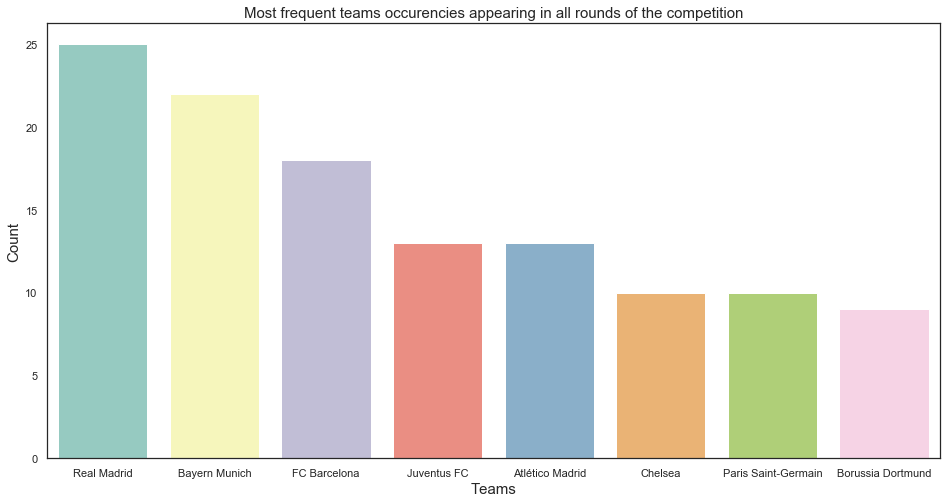

In [27]:
## Making a countplot in order to have a visual representation of the occurencies in the teams_round feature

occ_target = teams_round['team'] # we only want to visualize the team series
oft_occ = teams_round.team.value_counts().iloc[:8].index # only the first seven most occurencies interests me here

fig, ax = plt.subplots(figsize = (16, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target, data = teams_round, order = oft_occ, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in all rounds of the competition", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

In [28]:
## Making a function to see the teams that appear the most for each round of the competition (8th finals, Quarter-Finals, Semi_Finals, Finals)

def viz_round(subset, title):
    occ_target_per_round = subset['team']
    oft_occ_per_round = occ_target_per_round.value_counts().iloc[:8].index
    fig, ax = plt.subplots(figsize = (16, 10))
    sns.countplot(x = occ_target_per_round, data = subset, order = oft_occ_per_round, ax=ax) # creating the countplot 
    plt.title(title, fontsize = 15)
    plt.xlabel("Teams", fontsize = 15)
    plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

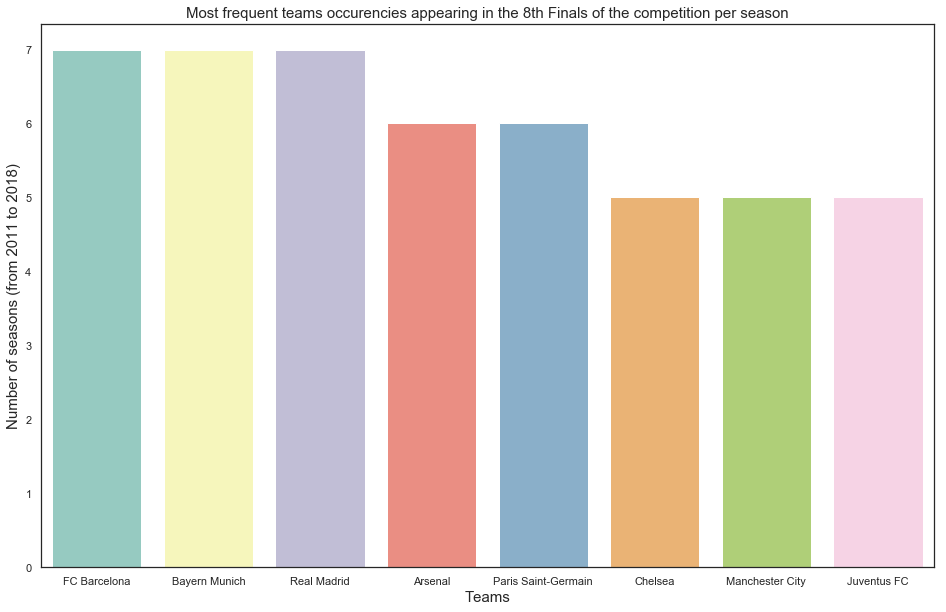

In [29]:
    # 8th finals
    
eig_finals = teams_round[teams_round['round'] == "8th Finals"] # filtering the subset team_rounds to only displaying the values corresponding to the 8th Finals

eig_finals.shape # (112, 18)
eig_finals.head()

viz_round(eig_finals, "Most frequent teams occurencies appearing in the 8th Finals of the competition per season")

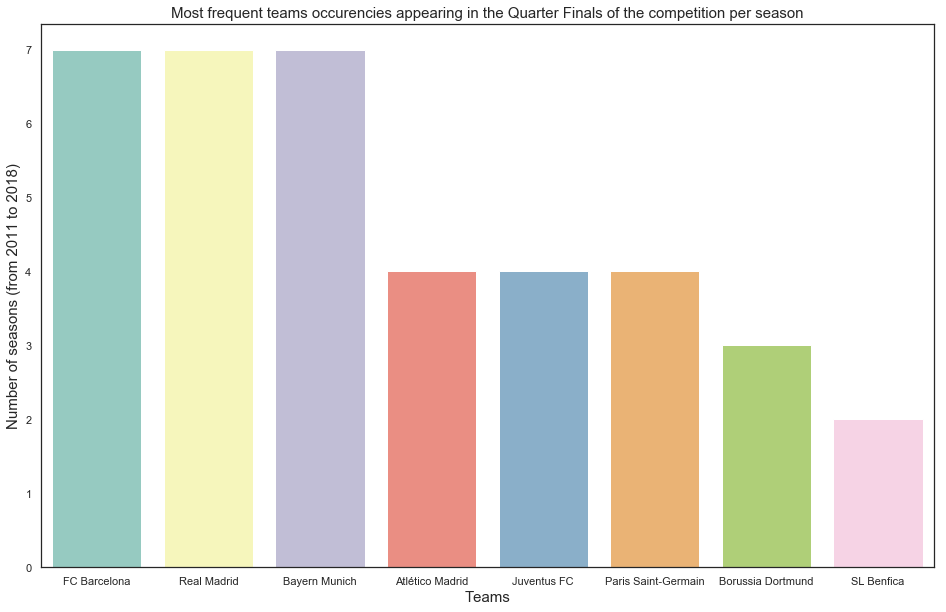

In [30]:
    # Quarter-finals
    
qter_finals = teams_round[teams_round['round'] == "Quarter Finals"] # filtering the subset team_rounds to quarter finals only

qter_finals.shape # (56, 18)
qter_finals.head()

viz_round(qter_finals, "Most frequent teams occurencies appearing in the Quarter Finals of the competition per season")

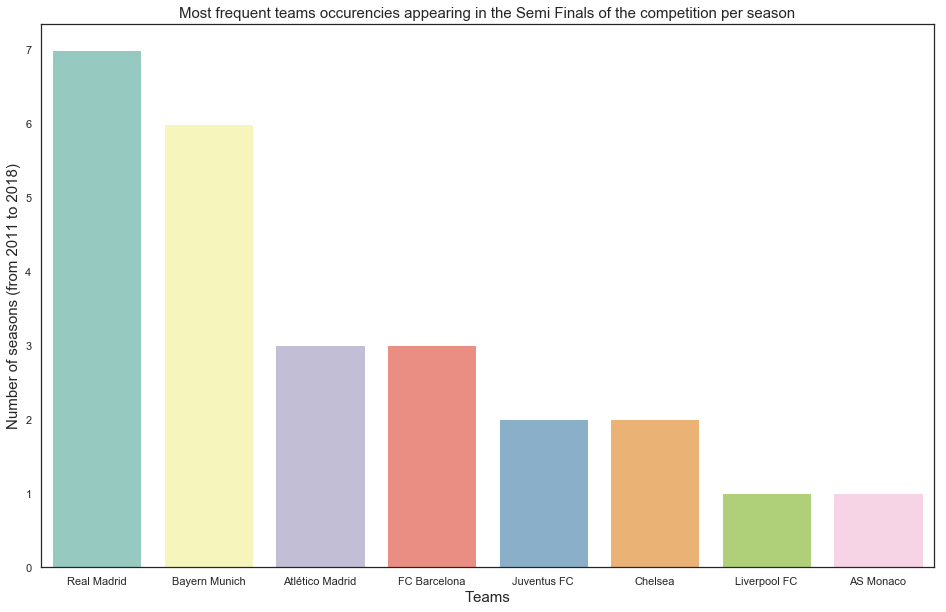

In [31]:
        # Semi-finals
    
semi_finals = teams_round[teams_round['round'] == "Semi Finals"] # filtering the subset team_rounds the semi finals only
semi_finals.shape # (28, 18)
semi_finals.head()

viz_round(semi_finals, "Most frequent teams occurencies appearing in the Semi Finals of the competition per season")

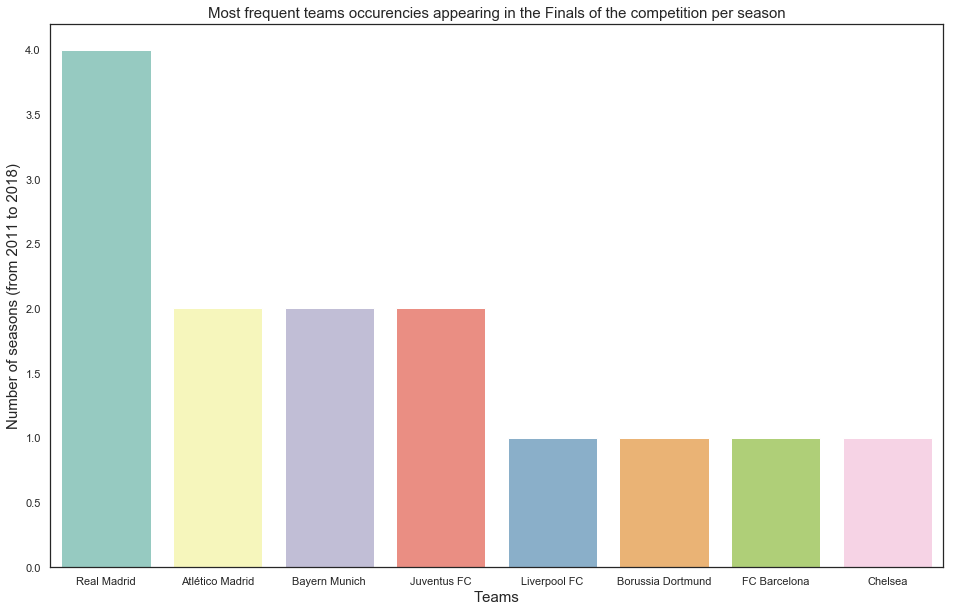

In [32]:
    # Finals
    
finals = teams_round[teams_round['round'] == "Finals"] # filtering the subset team_rounds to only displaying the values corresponding to the 8th Finals

finals.shape # (14, 18)
finals.head()

viz_round(finals, "Most frequent teams occurencies appearing in the Finals of the competition per season")

In [33]:
## For the teams rankings depending on the detailed stats during the whole competition

print('Total number of observations : {}'.format(teams_detailed_stats.shape[0]))
teams_detailed_stats.team_names_detailed_stats.value_counts()

Total number of observations : 210


Bayern Munich             7
FC Barcelona              7
Real Madrid               7
Manchester City           7
FC Porto                  7
SL Benfica                7
Arsenal                   6
Olympiakos                6
Juventus FC               6
Chelsea                   6
Borussia Dortmund         6
Paris Saint-Germain       6
Shakhtar Donetsk          6
CSKA Moscow               6
FC Basel                  5
Atletico Madrid           5
Bayer Leverkusen          5
Zenit St Petersburg       5
Manchester United         5
Ajax Amsterdam            4
SSC Napoli                4
Galatasaray               4
Sporting CP               3
Dynamo Kyiv               3
Celtic                    3
Valencia CF               3
AS Monaco                 3
AS Roma                   3
BATE Borisov              3
Lyon                      3
                         ..
PSV Eindhoven             2
Maribor                   2
Tottenham Hotspur FC      2
FC Copenhagen             2
Besiktas            

Text(0,0.5,'Number of seasons (from 2011 to 2018)')

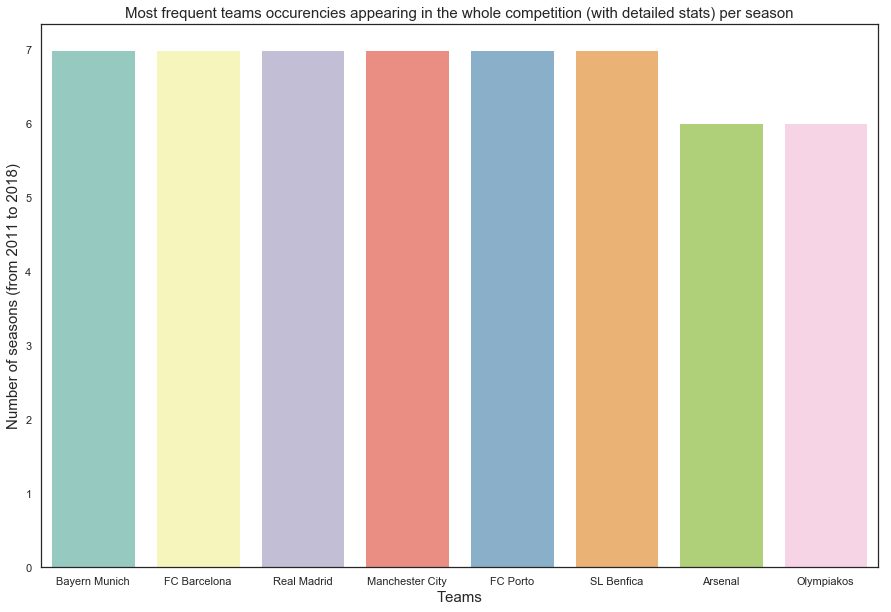

In [34]:
## Making a countplot in order to have a visual representation of the occurencies in the teams_detailed_stats feature

occ_target_2 = teams_detailed_stats['team_names_detailed_stats'] # we only want to visualize the team series
oft_occ_2 = teams_detailed_stats.team_names_detailed_stats.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 10)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_2, data = teams_detailed_stats, order = oft_occ_2, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in the whole competition (with detailed stats) per season", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

In [35]:
### For the scorers

print('Total number of observations : {}'.format(scorers.shape[0]))
scorers.scorer_name.value_counts()

Total number of observations : 210


Lionel Messi                 7
Karim Benzema                7
Cristiano Ronaldo            7
Robert Lewandowski           6
Thomas Müller                6
Edinson Cavani               5
Mario Mandzukic              5
Sergio Agüero                4
Neymar                       4
Gonzalo Higuaín              4
Arjen Robben                 3
Seydou Doumbia               3
Pierre-Emerick Aubameyang    3
Marco Reus                   3
Luis Suárez                  3
Zlatan Ibrahimovic           3
Hulk                         3
Mario Götze                  2
Saúl Ñíguez                  2
Joshua Kimmich               2
Luiz Adriano                 2
Son Heung-Min                2
Fernando Torres              2
Álvaro Morata                2
Kylian Mbappé                2
Jackson Martínez             2
Alex Teixeira                2
Raheem Sterling              2
Arturo Vidal                 2
Julian Draxler               2
                            ..
Philippe Coutinho            1
Frank La

Text(0,0.5,'Count')

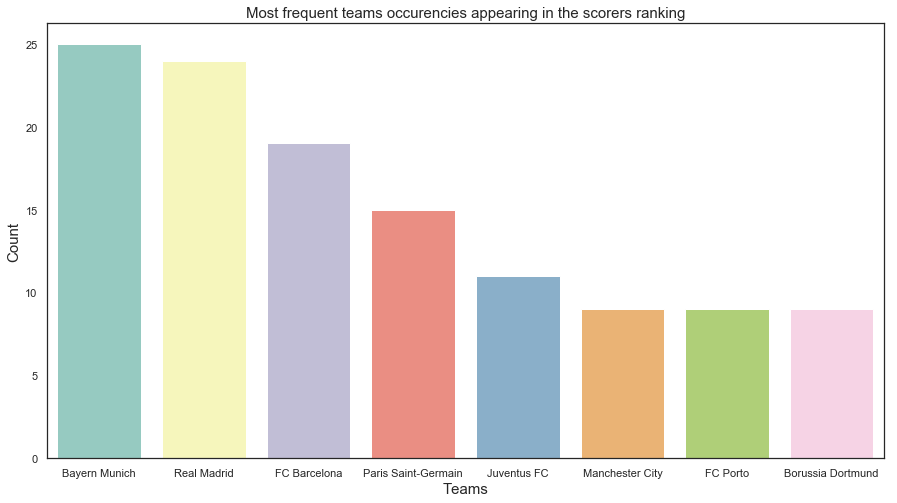

In [36]:
## Making a countplot in order to have a visual representation of the teams occurencies in the scorers feature

occ_target_2 = scorers['scorer_team'] # we only want to visualize the team series
oft_occ_2 = scorers.scorer_team.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_2, data = scorers, order = oft_occ_2, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in the scorers ranking", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0,0.5,'Number of seasons (from 2011 to 2018)')

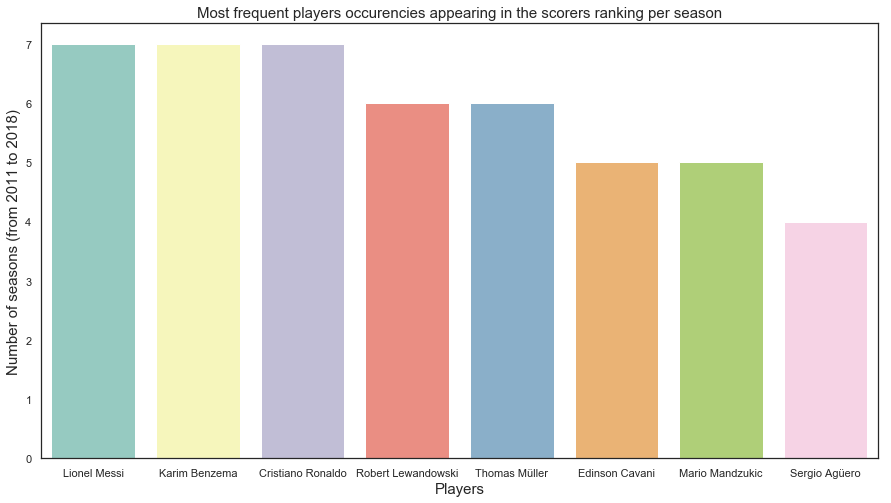

In [37]:
## Making a countplot in order to have a visual representation of the players occurencies in the scorers feature

occ_target_2 = scorers['scorer_name'] # we only want to visualize the team series
oft_occ_2 = scorers.scorer_name.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_2, data = scorers, order = oft_occ_2, ax=ax) # creating the countplot 
plt.title("Most frequent players occurencies appearing in the scorers ranking per season", fontsize = 15)
plt.xlabel("Players", fontsize = 15)
plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

In [38]:
### For the assists players

print('Total number of observations : {}'.format(assists.shape[0]))
assists.assist_name.value_counts()

Total number of observations : 210


Cristiano Ronaldo     6
Dani Alves            4
Luis Suárez           4
Neymar                4
Lionel Messi          4
Thomas Müller         4
Marcelo               3
Karim Benzema         3
Ezequiel Lavezzi      3
Ángel Di María        3
Juanfran              3
Mesut Özil            3
Isco                  3
Toni Kroos            3
Dries Mertens         2
Robert Lewandowski    2
Philipp Lahm          2
Thiago                2
Dani Carvajal         2
Nicolás Gaitán        2
Franck Ribéry         2
Hakan Calhanoglu      2
David Alaba           2
Alexis Sánchez        2
Douglas Costa         2
Frank Lampard         2
Andrés Iniesta        2
Sami Khedira          2
James Milner          2
Raheem Sterling       2
                     ..
Roberto Firmino       1
Samir Nasri           1
Edinson Cavani        1
Danilo Pereira        1
Casemiro              1
Gabi                  1
Mario Balotelli       1
Ashley Cole           1
Blaise Matuidi        1
Arjen Robben          1
Pablo Sarabia   

Text(0,0.5,'Count')

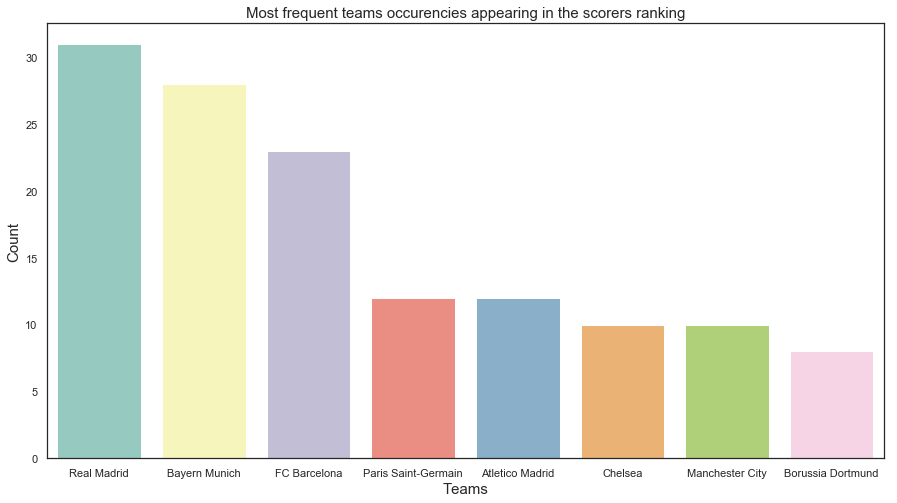

In [39]:
## Making a countplot in order to have a visual representation of the teams occurencies in the assists feature

occ_target_4 = assists['assist_team'] # we only want to visualize the team series
oft_occ_4 = occ_target_4.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_4, data = assists, order = oft_occ_4, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in the scorers ranking", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0,0.5,'Number of seasons (from 2011 to 2018)')

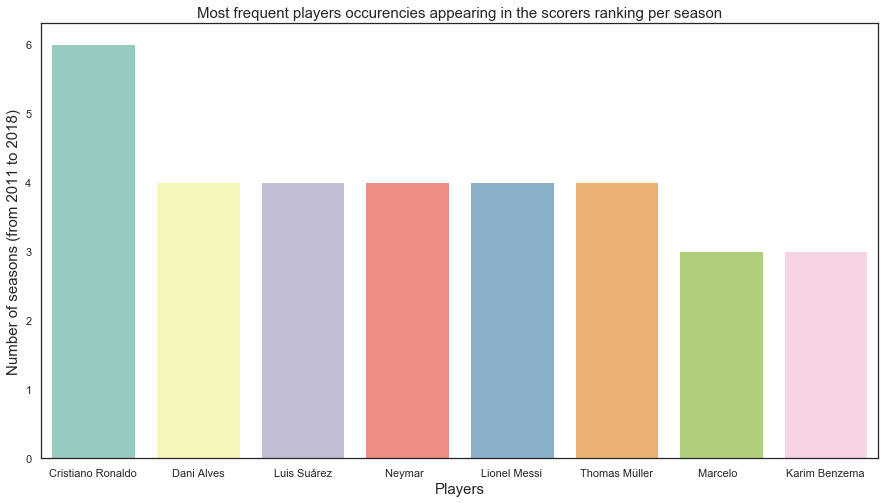

In [40]:
## Making a countplot in order to have a visual representation of the players occurencies in the assists feature

occ_target_4 = assists['assist_name'] # we only want to visualize the team series
oft_occ_4 = occ_target_4.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_4, data = assists, order = oft_occ_4, ax=ax) # creating the countplot 
plt.title("Most frequent players occurencies appearing in the scorers ranking per season", fontsize = 15)
plt.xlabel("Players", fontsize = 15)
plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

##### Highlights

<i>
With this first quick analysis, we can already notice that there are four teams (also called the Big Four in Europe) that are very dominant in this competitions :
    - Real Madrid (a 13 times Champions League winner, one of the two best Spanish team with the FC Barcelona)
    - Bayern Munich (a 5 times Champions League winner, the best German team since almost 8 years in a row)
    - FC Barcelona (a 5 times Champions League winner, one of the two superpower in Spain with the Real Madrid)
    - Juventus FC (a 1 time Champions League winner, the best Italian team since 9 years in a row)
    
Indeed, by calculating the occurencies of each team we see that :
    - Real Madrid represents 11% of the observations
    - Bayern Munich represents 10,4% of the observations
    - FC Barcelona represents 8,6% of the observations
    - Juventus FC represents 6,2% of the observations

Those four teams already represent 36,2% of the total observations of the dataset.

Furthermore, regarding the players analysis, we can notice that the players that have the best frequencies are :
    - Cristiano Ronaldo (played for Real Madrid from 2009 to 2018 and is currently playing at Juventus FC in 2019, the best scorer in UCL since 2013)
    - Lionel Messi (playing for FC Barcelona, the second best scorer in the history of the UCL behind Cristiano Ronaldo and a genius assist player)
    - Robert Lewandowski (playing for Bayern Munich, the best scorer in Germany since 2012)
    - Thomas Müller (playing for Bayern Munich, one of the best german players)
    - Mario Mandzukic & Gonzalo Higuain (playing for Juventus FC, among the best scorers in the world)
    - Dani Alves (playing for Juventus FC, one of the best defenders in the world)
    - Neymar & Luis Suarez (playing for FC Barcelona, among the best strikers in the world)
    - Isco & Toni Kroos (playing for Real Madrid, among the best midfielders in the world)
    
So, even for the players, it seems that the best ones are those with the best frequencies, which is quite logical if their respective teams are performing well.

We may have a first correlation between players and teams performances and an answer to one of our questions above here !
</i>

###### For teams_round subset

<i>
    We're gonna make some descriptive and graphical analysis on this subset in order to extract potential useful informations to be able to answer our interrogations.
</i>

In [41]:
#### Looking at the descriptive statistics for each of the subset in order to check there are not strange values, also called "outliers".

### Overview of the teams_round subset

teams_round.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,last_results,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,8,WW,42,50,17,83,75,3.75
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,3,DW,50,50,0,92,75,3.66
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,6,LW,38,46,15,92,38,2.85
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,1,LW,38,62,0,83,62,3.47
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,1,WL,40,50,20,80,60,3.00


In [42]:
### For all of the teams performances in each round of the competition, in overall

teams_round.describe()

,team_rank,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,6.166667,1.933333,0.776190,0.380952,0.776190,2.880952,2.885714,0.004762,37.933333,50.814286,18.228571,79.985714,58.852381,2.979095
std,4.460977,0.250040,0.665201,0.542561,0.665201,1.944227,1.943283,2.942020,15.712590,16.837779,13.011410,14.498137,18.663787,0.676703
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,10.000000,0.000000,30.000000,10.000000,1.200000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.000000,25.000000,38.000000,10.000000,70.000000,40.000000,2.500000
50%,5.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,38.000000,50.000000,17.000000,81.500000,58.000000,2.900000
75%,9.000000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,50.000000,62.000000,25.000000,92.000000,75.000000,3.415000
max,16.000000,2.000000,2.000000,2.000000,2.000000,10.000000,10.000000,8.000000,77.000000,92.000000,63.000000,100.000000,100.000000,4.500000


In [43]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib(feature, title):
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=True, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

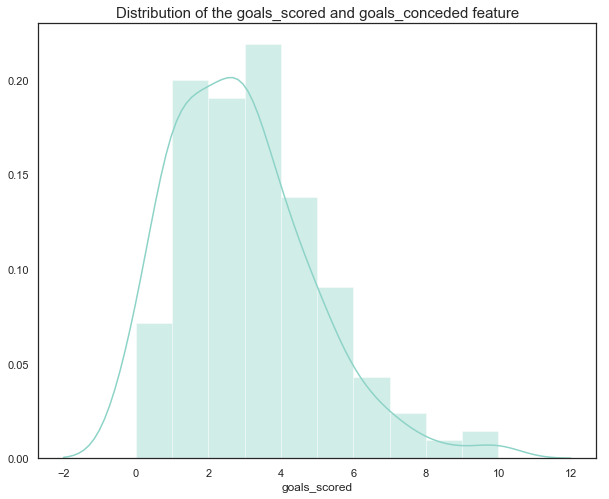

In [44]:
### Looking at the univariate distribution of the relevant features of the subset teams_round

## goals_scored & goals_conceded as they almost have the same distribution

feature_1 = teams_round['goals_scored']
distrib(feature_1, "Distribution of the goals_scored and goals_conceded feature")

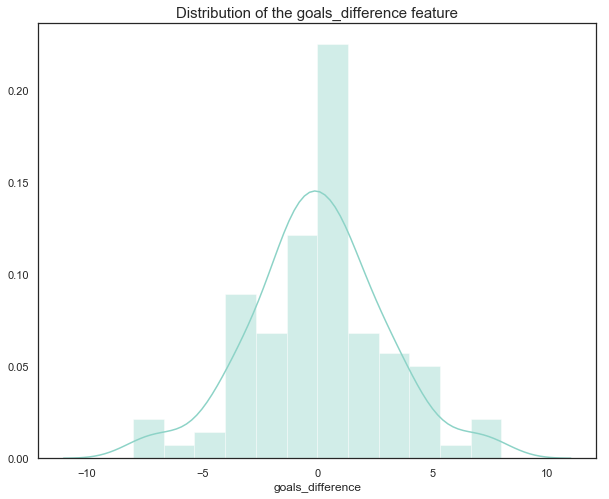

In [45]:
## goals_difference

feature_2 = teams_round['goals_difference']
distrib(feature_2, "Distribution of the goals_difference feature")

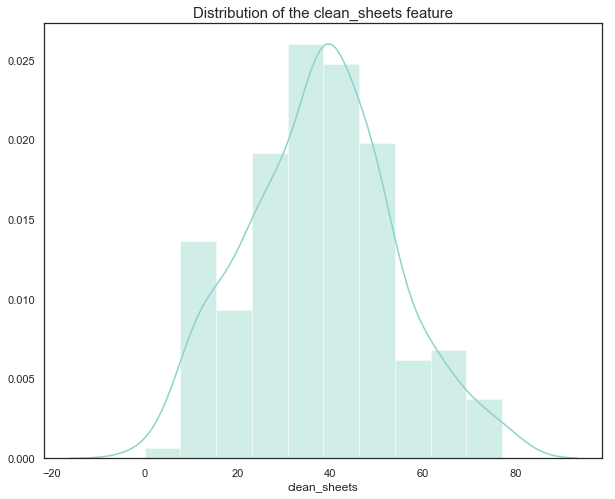

In [46]:
## clean_sheets

feature_3 = teams_round['clean_sheets']
distrib(feature_3, "Distribution of the clean_sheets feature")

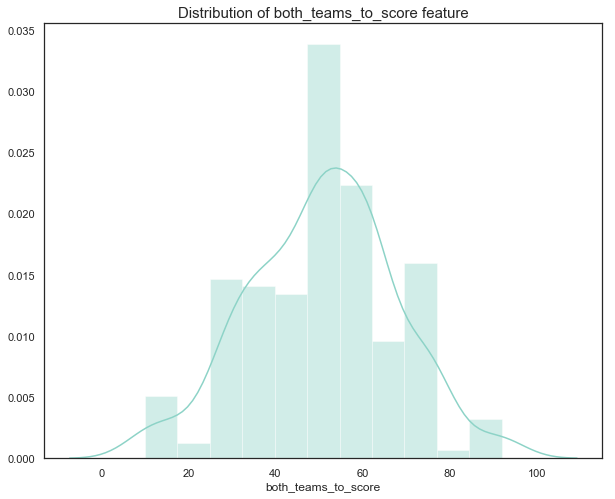

In [47]:
## both_teams_to_score

feature_4 = teams_round['both_teams_to_score']
distrib(feature_4, "Distribution of both_teams_to_score feature")

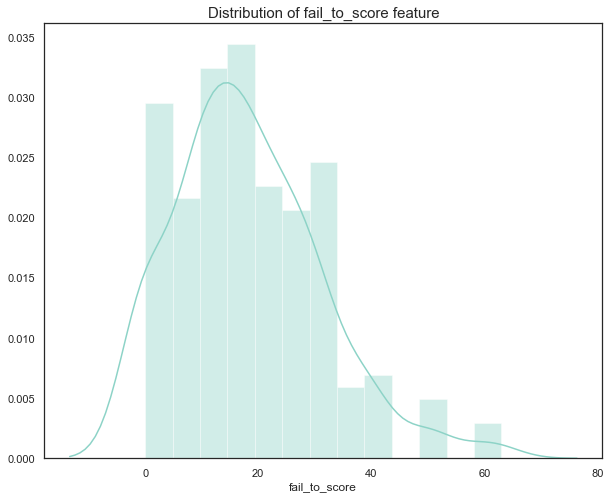

In [48]:
## fail_to_score

feature_5 = teams_round['fail_to_score']
distrib(feature_5, "Distribution of fail_to_score feature")

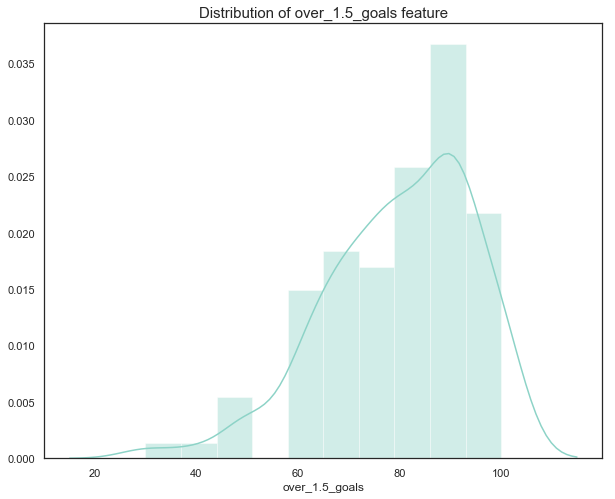

In [49]:
## over_1.5_goals

feature_6 = teams_round['over_1.5_goals']
distrib(feature_6, "Distribution of over_1.5_goals feature")

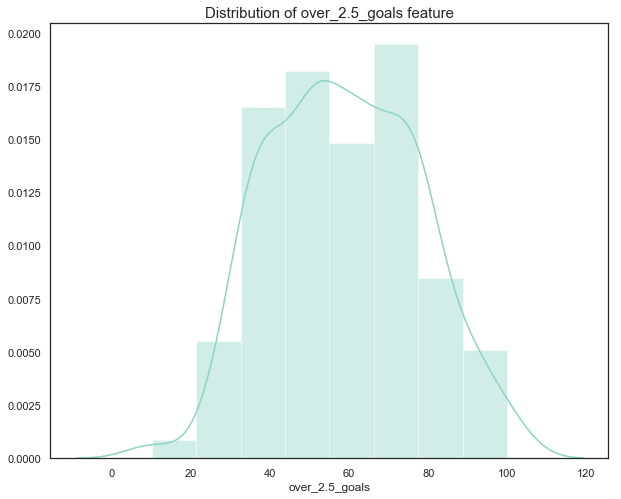

In [50]:
## over_2.5_goals

feature_7 = teams_round['over_2.5_goals']
distrib(feature_7, "Distribution of over_2.5_goals feature")

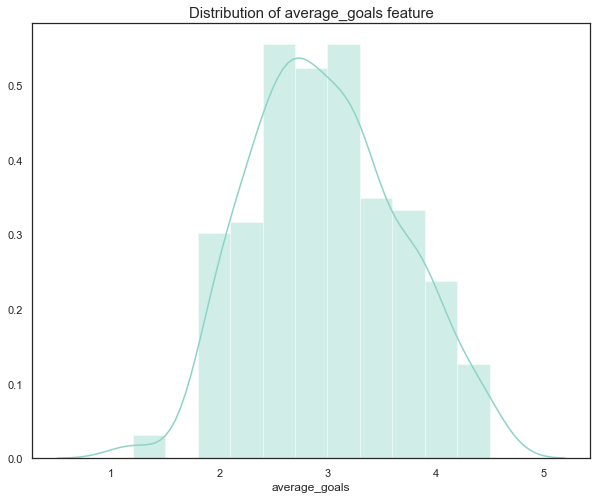

In [51]:
## average_goals

feature_8 = teams_round['average_goals']
distrib(feature_8, "Distribution of average_goals feature")

In [52]:
## Function to have an overview of potential correlation between two features    

def bi_distrib(x_feature, y_feature, data, title, hue):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, hue = hue, data = data)
    plt.title(title, size = 12)
    
def bi_distrib_2(x_feature, y_feature, data, title):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, data = data)
    plt.title(title, size = 12)  

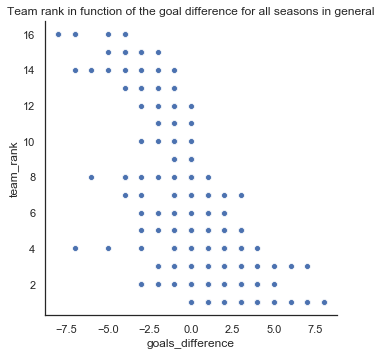

In [53]:
## is the rank of the team depending on the goal difference for all seasons in general ? 

bi_distrib_2("goals_difference", "team_rank", teams_round, "Team rank in function of the goal difference for all seasons in general")

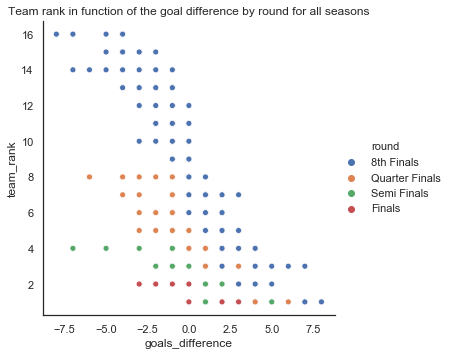

In [54]:
## is the rank of the team depending on the goal difference for each round for all seasons ?

bi_distrib("goals_difference", "team_rank", teams_round, "Team rank in function of the goal difference by round for all seasons", "round")

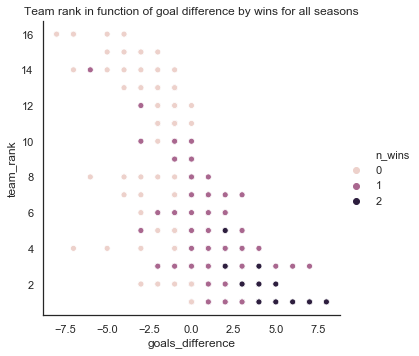

In [55]:
## does the goal difference increases team winning possibility, thus increasing their rank for all seasons ?

bi_distrib("goals_difference", "team_rank", teams_round, "Team rank in function of goal difference by wins for all seasons", "n_wins")

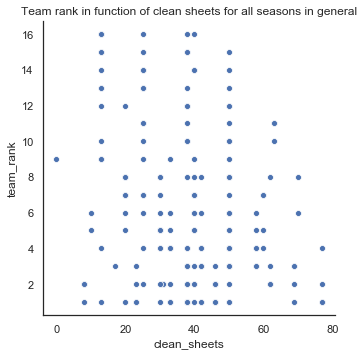

In [56]:
## is the rank of a team depending on the number of clean sheets for all seasons in general ?

bi_distrib_2("clean_sheets", "team_rank", teams_round, "Team rank in function of clean sheets for all seasons in general")

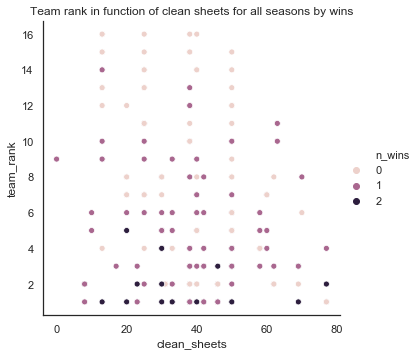

In [57]:
## is the rank of the team depending on the number of clean sheets for all seasons by wins?

bi_distrib("clean_sheets", "team_rank", teams_round, "Team rank in function of clean sheets for all seasons by wins", "n_wins")

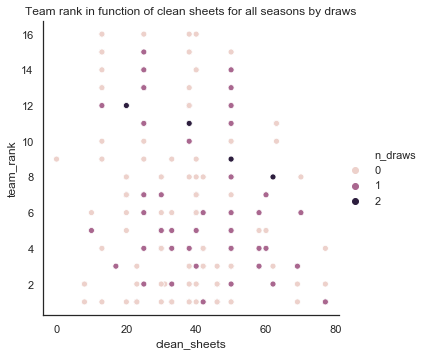

In [58]:
## is the rank of the team depending on the number of clean sheets for all seasons by draws?

bi_distrib("clean_sheets", "team_rank", teams_round, "Team rank in function of clean sheets for all seasons by draws", "n_draws")

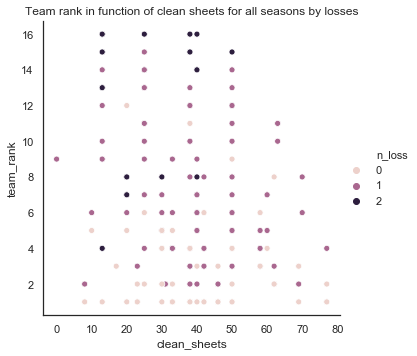

In [59]:
## is the rank of the team depending on the number of clean sheets for all seasons by losses?

bi_distrib("clean_sheets", "team_rank", teams_round, "Team rank in function of clean sheets for all seasons by losses", "n_loss")

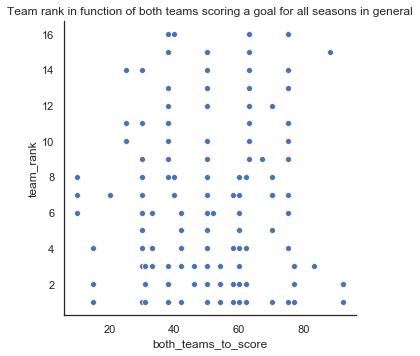

In [60]:
## is the rank of the team depending on the number of matches where both teams score a goal for each round for all seasons in general?

bi_distrib_2("both_teams_to_score", "team_rank", teams_round, "Team rank in function of both teams scoring a goal for all seasons in general")

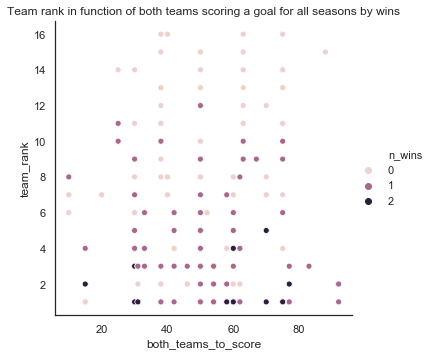

In [61]:
## is the rank of the team depending on the number of matches where both teams score a goal for each round for all seasons by wins?

bi_distrib("both_teams_to_score", "team_rank", teams_round, "Team rank in function of both teams scoring a goal for all seasons by wins", "n_wins")

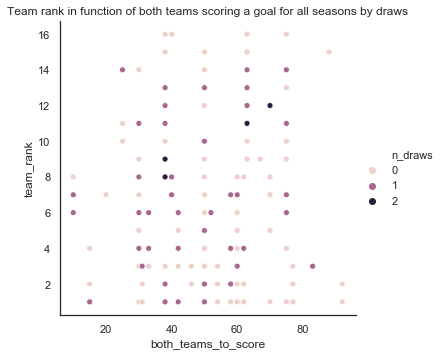

In [62]:
## is the rank of the team depending on the number of matches where both teams score a goal for each round for all seasons by draws?

bi_distrib("both_teams_to_score", "team_rank", teams_round, "Team rank in function of both teams scoring a goal for all seasons by draws", "n_draws")

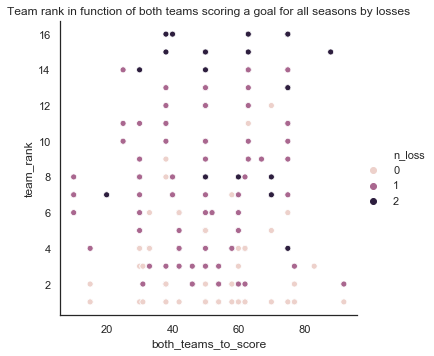

In [63]:
## is the rank of the team depending on the number of matches where both teams score a goal for each round for all seasons by losses?

bi_distrib("both_teams_to_score", "team_rank", teams_round, "Team rank in function of both teams scoring a goal for all seasons by losses", "n_loss")

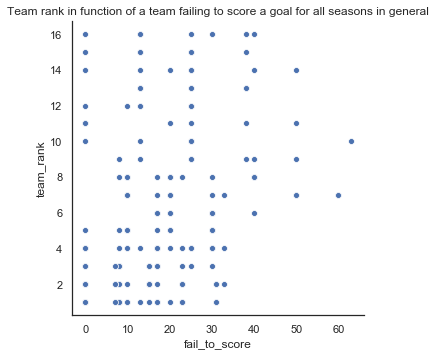

In [64]:
## does the number of match where a team failed to score a goal have an influence on the team ranking in general?

bi_distrib_2("fail_to_score", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons in general")

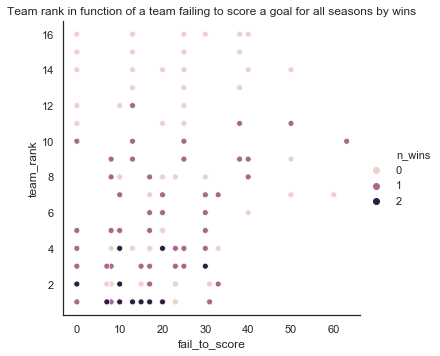

In [65]:
## does the number of match where a team failed to score a goal have an influence on the team ranking by wins?

bi_distrib("fail_to_score", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by wins", "n_wins")

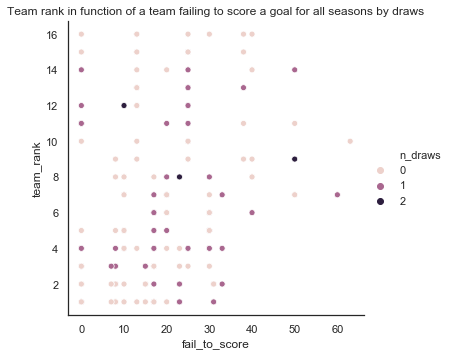

In [66]:
## does the number of match where a team failed to score a goal have an influence on the team ranking by draws?

bi_distrib("fail_to_score", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by draws", "n_draws")

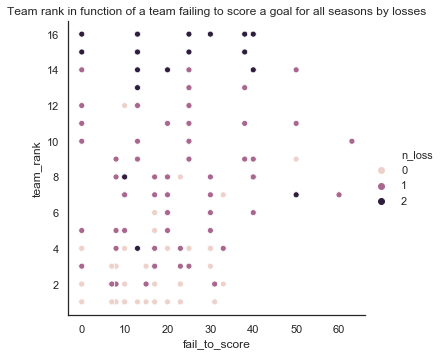

In [67]:
## does the number of match where a team failed to score a goal have an influence on the team ranking by losses?

bi_distrib("fail_to_score", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by losses", "n_loss")

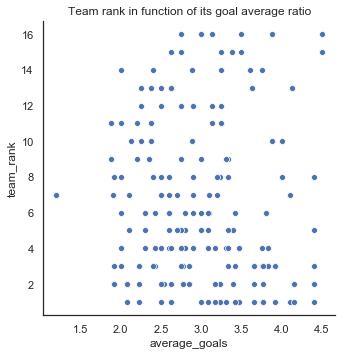

In [68]:
## does a team with a high average goal rate have more chances to be high ranked ? (which basically means that he is winning a lot of games)

bi_distrib_2("average_goals", "team_rank", teams_round, "Team rank in function of its goal average ratio")

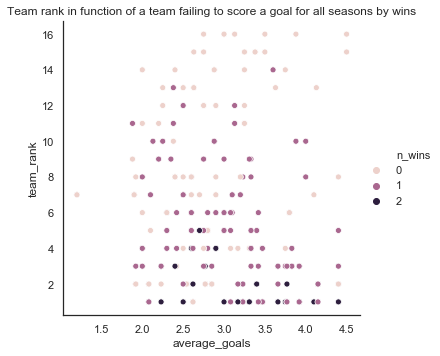

In [69]:
## does the number of match where a team with a high average goals have an influence on its ranking by wins?

bi_distrib("average_goals", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by wins", "n_wins")

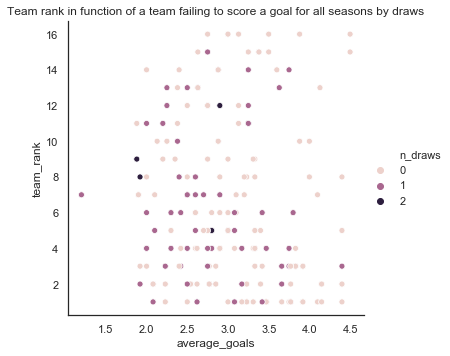

In [70]:
## does the number of match where a team with a high average goals have an influence on its ranking by draws?

bi_distrib("average_goals", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by draws", "n_draws")

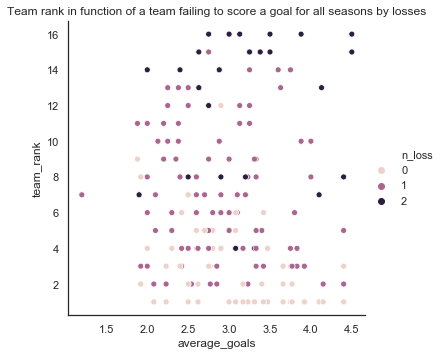

In [71]:
## does the number of match where a team with a high average goals have an influence on its ranking by losses?

bi_distrib("average_goals", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by losses", "n_loss")

Text(0.5,1.02,'Pairplot representing the correlations between the offensive and defensive stats')

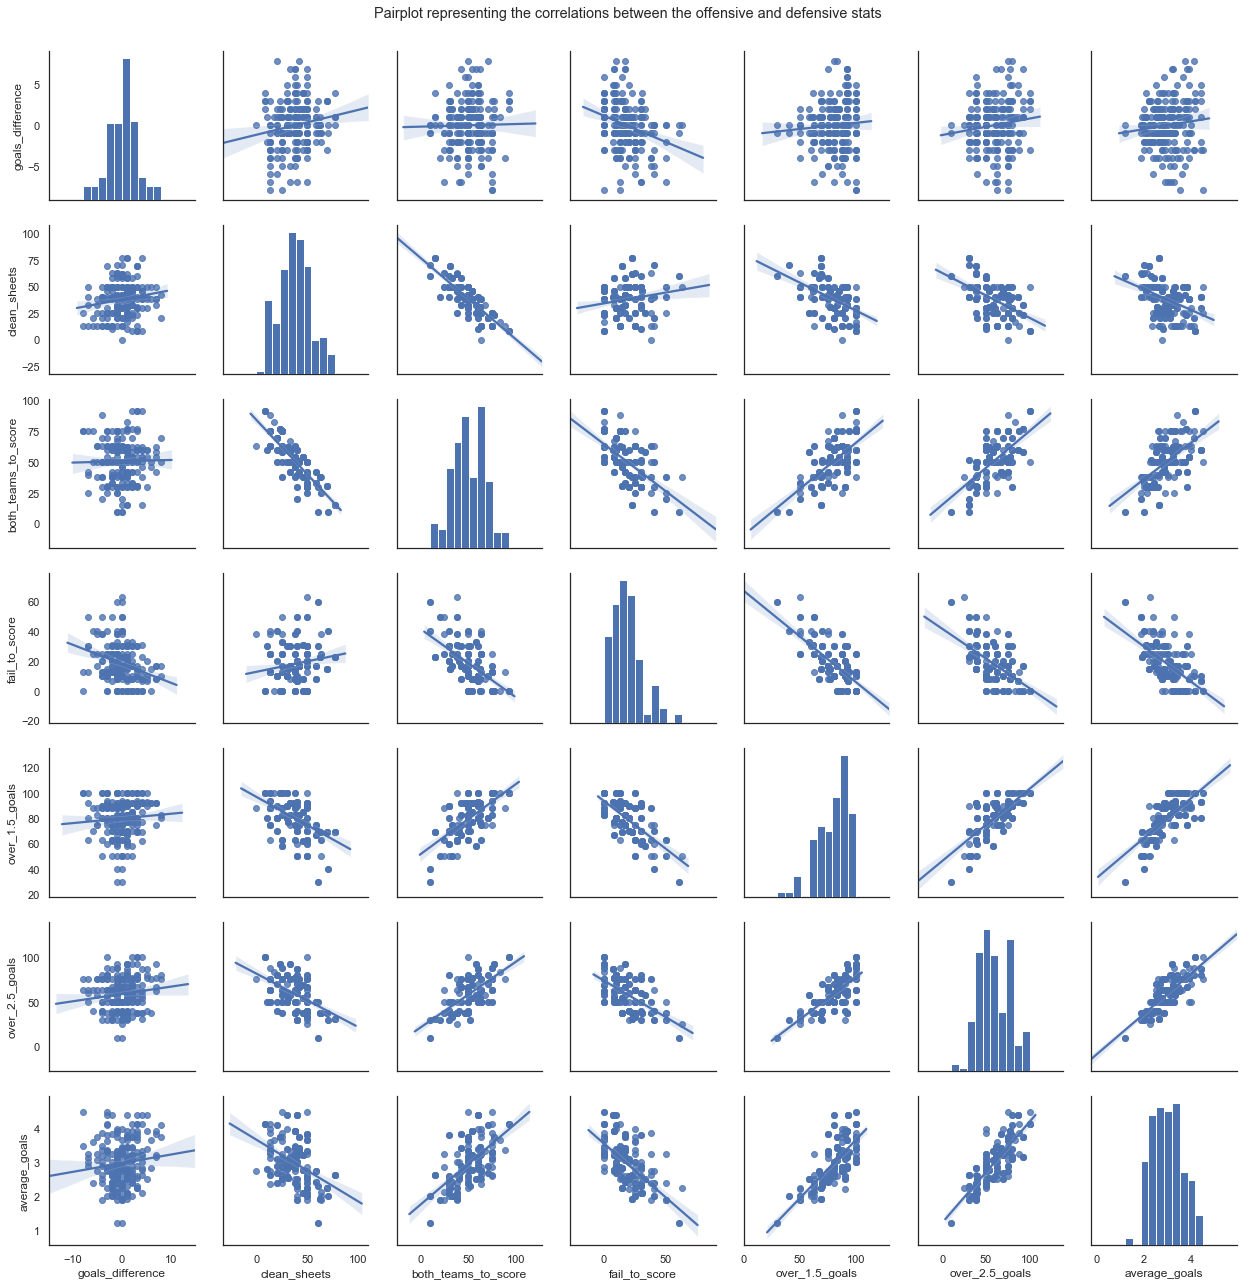

In [72]:
## visualizing pairwise relationships in the subset for the offensive and defensive stats (excluding the team ranking and the results)

off_def_stats = ['goals_difference', 'clean_sheets', 'both_teams_to_score', 'fail_to_score', 'over_1.5_goals', 'over_2.5_goals', 'average_goals']
pair_data = teams_round[off_def_stats]

pair_data.head()

sns.pairplot(pair_data, kind = "reg").fig.suptitle("Pairplot representing the correlations between the offensive and defensive stats", y = 1.02)

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset')

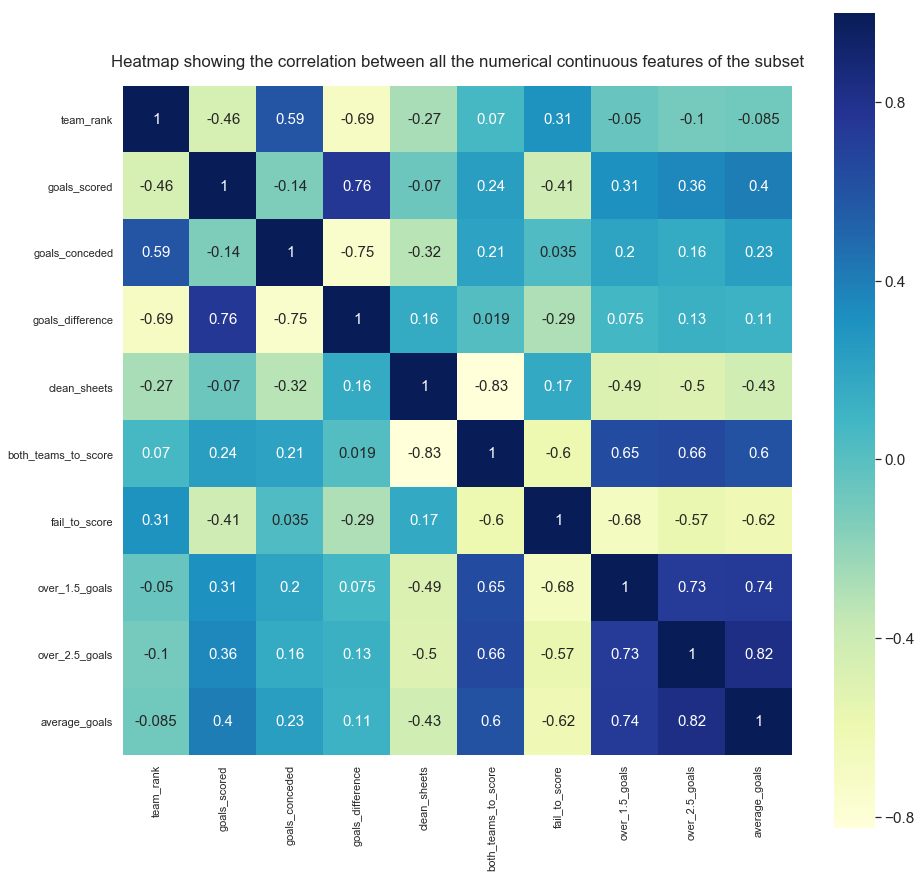

In [73]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient = ['team_rank', 'goals_scored', 'goals_conceded', 'goals_difference', 'clean_sheets', 'both_teams_to_score', 'fail_to_score', 
                                    'over_1.5_goals', 'over_2.5_goals', 'average_goals']

features_hm = teams_round[features_coefficient]

features_hm.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1.4)
sns.heatmap(features_hm.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, cmap = "YlGnBu", ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset', y = 1.02)

##### Quick observations

<i>
We can first notice that the subset is normally distributed (so the normal law can be applied on it), and overall the standard deviation seems to not be to high so there aren't a lot of values dispersion so we can conclude that the data seems to be homegeneous.
    
There are no outliers in these subsets as well. <br><br>

Then, by observing more in details all of the teams performances in each round from 2011 to 2018, we can see that :
        - the average percentage of wins is about 77,6%
        - the average percentage of draws is about 38%
        - the average percentage of losses is about 77,6%
        - the average of goals scored is about 2,88 goals/match (which is in the standard each year, in 2019 the average goals scored per match is 2,86)
        - the average of goals conceded is about 2,89 goals/match
        - in average, there are around 51 matches where both teams managed to score a goal and 18 matches where a team failed to score a goal.
        - 25% of teams have a goals difference below -2 goals per match, around 25 clean sheets, 70 matches where they score more than 1.5 goals, 40   matches where they score more than 2.5 goals and with an average goals of 2.5 goals/match (which corresponds to the low-rank teams that got smashed by the favorites)
        - 25% of teams have a goals difference above 2 goals per match, around 50 clean sheets, 92 matches where they score more than 1.5 goals, 75 matches where they score more than 2.5 goals and with an average goals of 3.42 goals/match (which probably corresponds to the top-tier teams of the competition)
        - around 50% of teams have a goals difference of 0 (which probably corresponds to the average teams of the competition)
</i>

###### For teams_detailed_stats subset

<i>
We are going to do the same steps that the subset below in order to learn more from this subset and to find eventual relationships between features.
</i>

In [74]:
## Overview of the teams_detailed_stats subset

teams_detailed_stats.head()

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
1,2011/12,2,Real Madrid,35,19.1,22,1,56.1,85.9,7.15
2,2011/12,3,FC Barcelona,35,19.5,17,0,68.2,90.5,7.15
3,2011/12,4,Bayern Munich,26,19.1,27,1,55.1,86.2,7.11
4,2011/12,5,Valencia CF,12,16.7,11,0,58.5,85.1,7.04


In [75]:
### For all of the teams performances in the whole competition

teams_detailed_stats.describe()

,team_rank_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,15.500000,12.023810,13.050476,15.561905,0.714286,49.873810,81.392857,6.817000
std,8.676124,8.124298,3.081000,5.560324,0.832524,5.899893,4.539175,0.205074
min,1.000000,1.000000,5.500000,4.000000,0.000000,36.300000,65.500000,6.350000
25%,8.000000,6.000000,10.800000,12.000000,0.000000,46.100000,78.625000,6.680000
50%,15.500000,9.500000,12.850000,15.000000,1.000000,49.600000,81.600000,6.820000
75%,23.000000,15.750000,14.800000,19.000000,1.000000,53.200000,84.400000,6.940000
max,30.000000,41.000000,21.700000,34.000000,4.000000,68.200000,90.500000,7.310000


In [76]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib_2(feature, title):
    sns.set(style = "white", palette = "Set1")
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=True, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

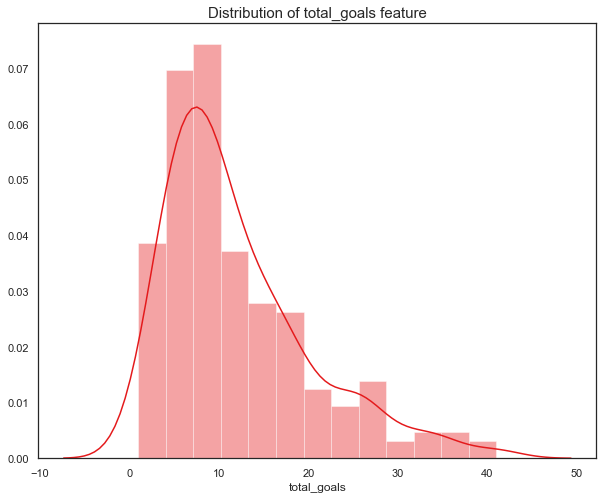

In [77]:
## Distribution of total_goals

feat_1 = teams_detailed_stats['total_goals']
distrib_2(feat_1, "Distribution of total_goals feature")

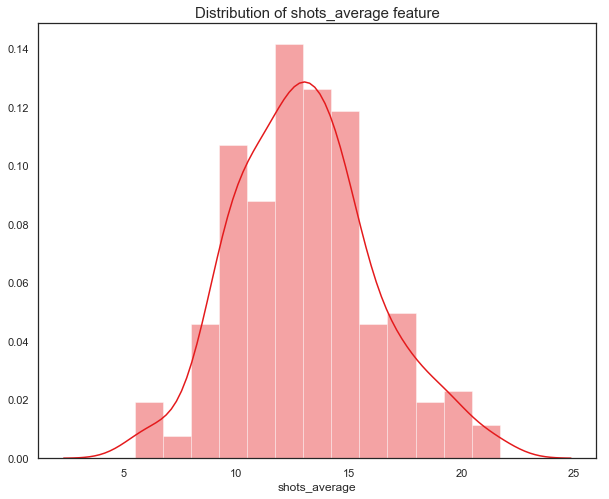

In [78]:
## Distribution of shots_average

feat_2 = teams_detailed_stats['shots_average']
distrib_2(feat_2, "Distribution of shots_average feature")

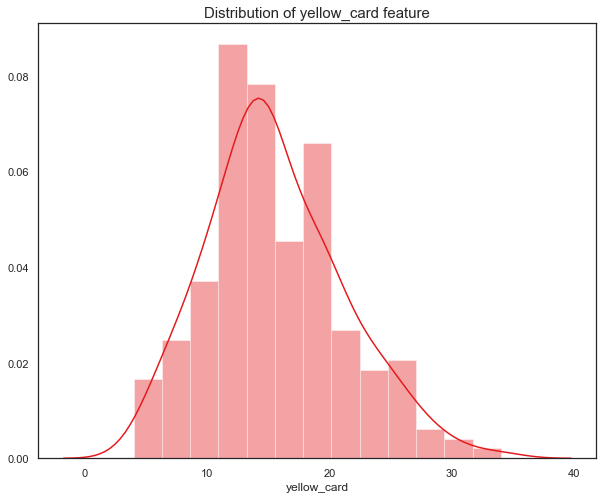

In [79]:
## Distribution of yellow_card

feat_3 = teams_detailed_stats['yellow_card']
distrib_2(feat_3, "Distribution of yellow_card feature")

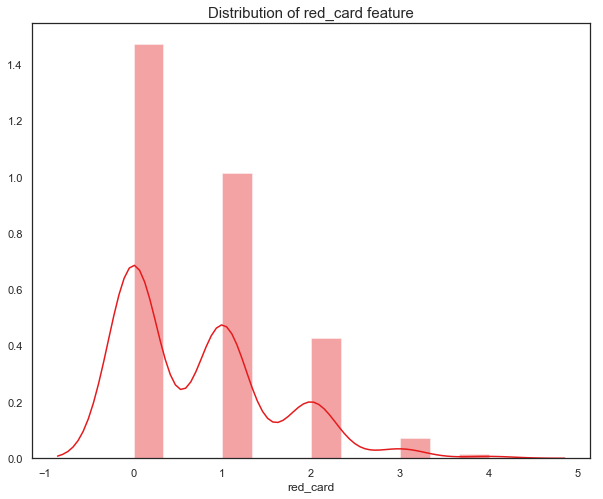

In [80]:
## Distribution of red_card

feat_4 = teams_detailed_stats['red_card']
distrib_2(feat_4, "Distribution of red_card feature")

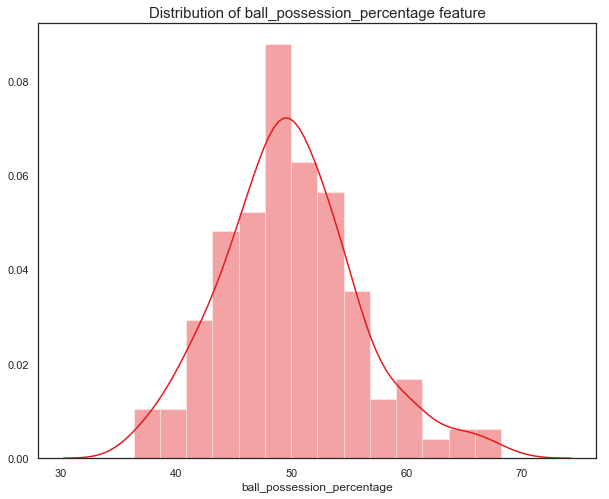

In [81]:
## Distribution of ball_possession_percentage

feat_5 = teams_detailed_stats['ball_possession_percentage']

distrib_2(feat_5, "Distribution of ball_possession_percentage feature")

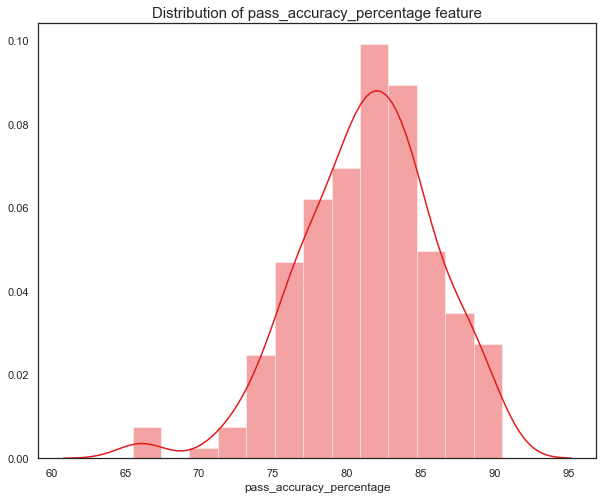

In [82]:
## Distribution of pass_accuracy_percentage

feat_6 = teams_detailed_stats['pass_accuracy_percentage']

distrib_2(feat_6, "Distribution of pass_accuracy_percentage feature")

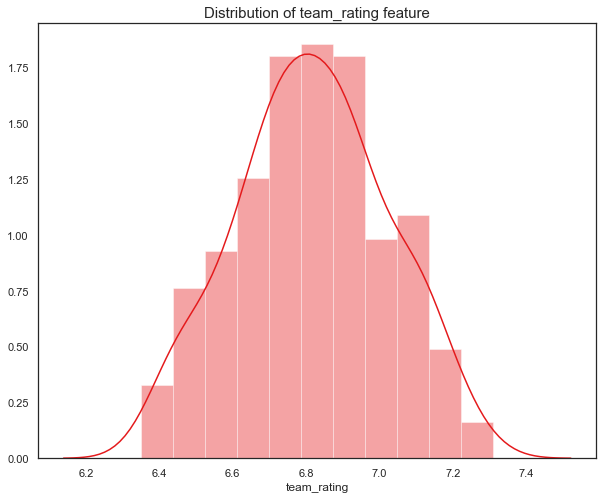

In [83]:
## Distribution of team_rating

feat_7 = teams_detailed_stats['team_rating']

distrib_2(feat_7, "Distribution of team_rating feature")

In [84]:
## Functions to see the bivariate distribution of the team_detailed_stats subset in order to reveal potential correlations

"""
## Function to have an overview of potential correlation between two features    

def bi_distrib(x_feature, y_feature, data, title, hue):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, hue = hue, data = data)
    plt.title(title, size = 12)
    
def bi_distrib_2(x_feature, y_feature, data, title):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, data = data)
    plt.title(title, size = 12) 
"""

'\n## Function to have an overview of potential correlation between two features    \n\ndef bi_distrib(x_feature, y_feature, data, title, hue):\n    sns.set(style = "white")\n    sns.relplot(x = x_feature, y = y_feature, hue = hue, data = data)\n    plt.title(title, size = 12)\n    \ndef bi_distrib_2(x_feature, y_feature, data, title):\n    sns.set(style = "white")\n    sns.relplot(x = x_feature, y = y_feature, data = data)\n    plt.title(title, size = 12) \n'

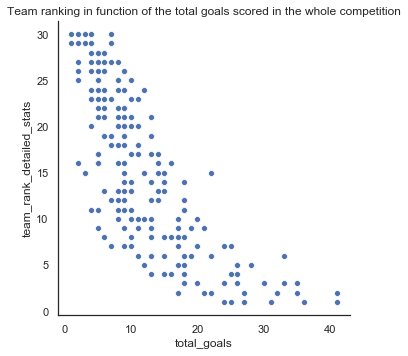

In [85]:
### Does the total number scored by a team in the whole competition have an influence on its final ranking (rank 1 = winner) ?

bi_distrib_2("total_goals", "team_rank_detailed_stats", teams_detailed_stats, "Team ranking in function of the total goals scored in the whole competition")

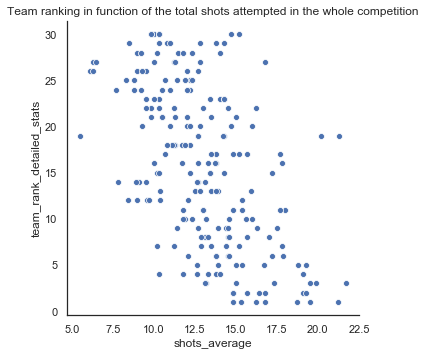

In [86]:
### Does the number of shots attempted per match by a team in the whole competition have an influence on its final ranking ?

bi_distrib_2("shots_average", "team_rank_detailed_stats", teams_detailed_stats, "Team ranking in function of the total shots attempted in the whole competition")

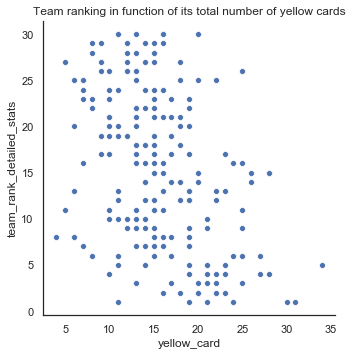

In [87]:
### Does the number of yellow cards affects the team results ?

bi_distrib_2("yellow_card", "team_rank_detailed_stats", teams_detailed_stats, "Team ranking in function of its total number of yellow cards")

Text(0.5,1,'Team ranking in function of its total number of red cards')

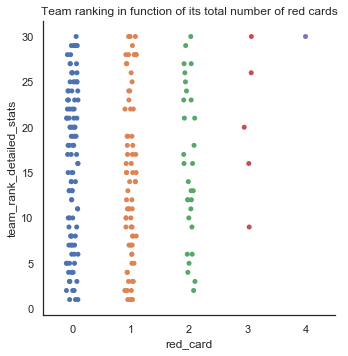

In [88]:
### Does the number of red cards affects the team results ?

sns.catplot(x = "red_card", y = "team_rank_detailed_stats", data = teams_detailed_stats)
plt.title("Team ranking in function of its total number of red cards")

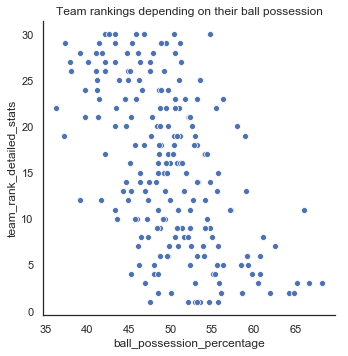

In [89]:
### Does the ball possession percentage allows a team to win more games, thus increasing their rankings ?

bi_distrib_2("ball_possession_percentage", "team_rank_detailed_stats", teams_detailed_stats, "Team rankings depending on their ball possession")

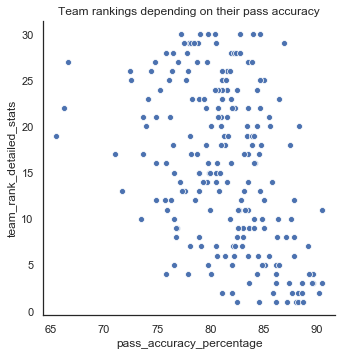

In [90]:
### Does the pass accuracy allows a team to win more games ?

bi_distrib_2("pass_accuracy_percentage", "team_rank_detailed_stats", teams_detailed_stats, "Team rankings depending on their pass accuracy")

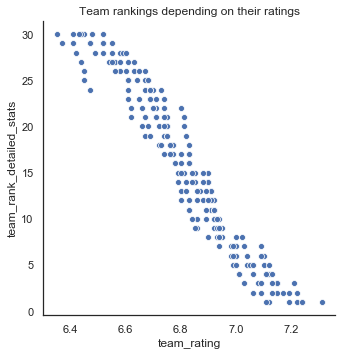

In [91]:
### Does the team ratings (attributed by specialized forecasters) is necessarly true regarding a team ranking ?

bi_distrib_2("team_rating", "team_rank_detailed_stats", teams_detailed_stats, "Team rankings depending on their ratings")

Text(0.5,1.02,'Pairplot representing the correlations between the offensive and defensive stats for the detailed stats')

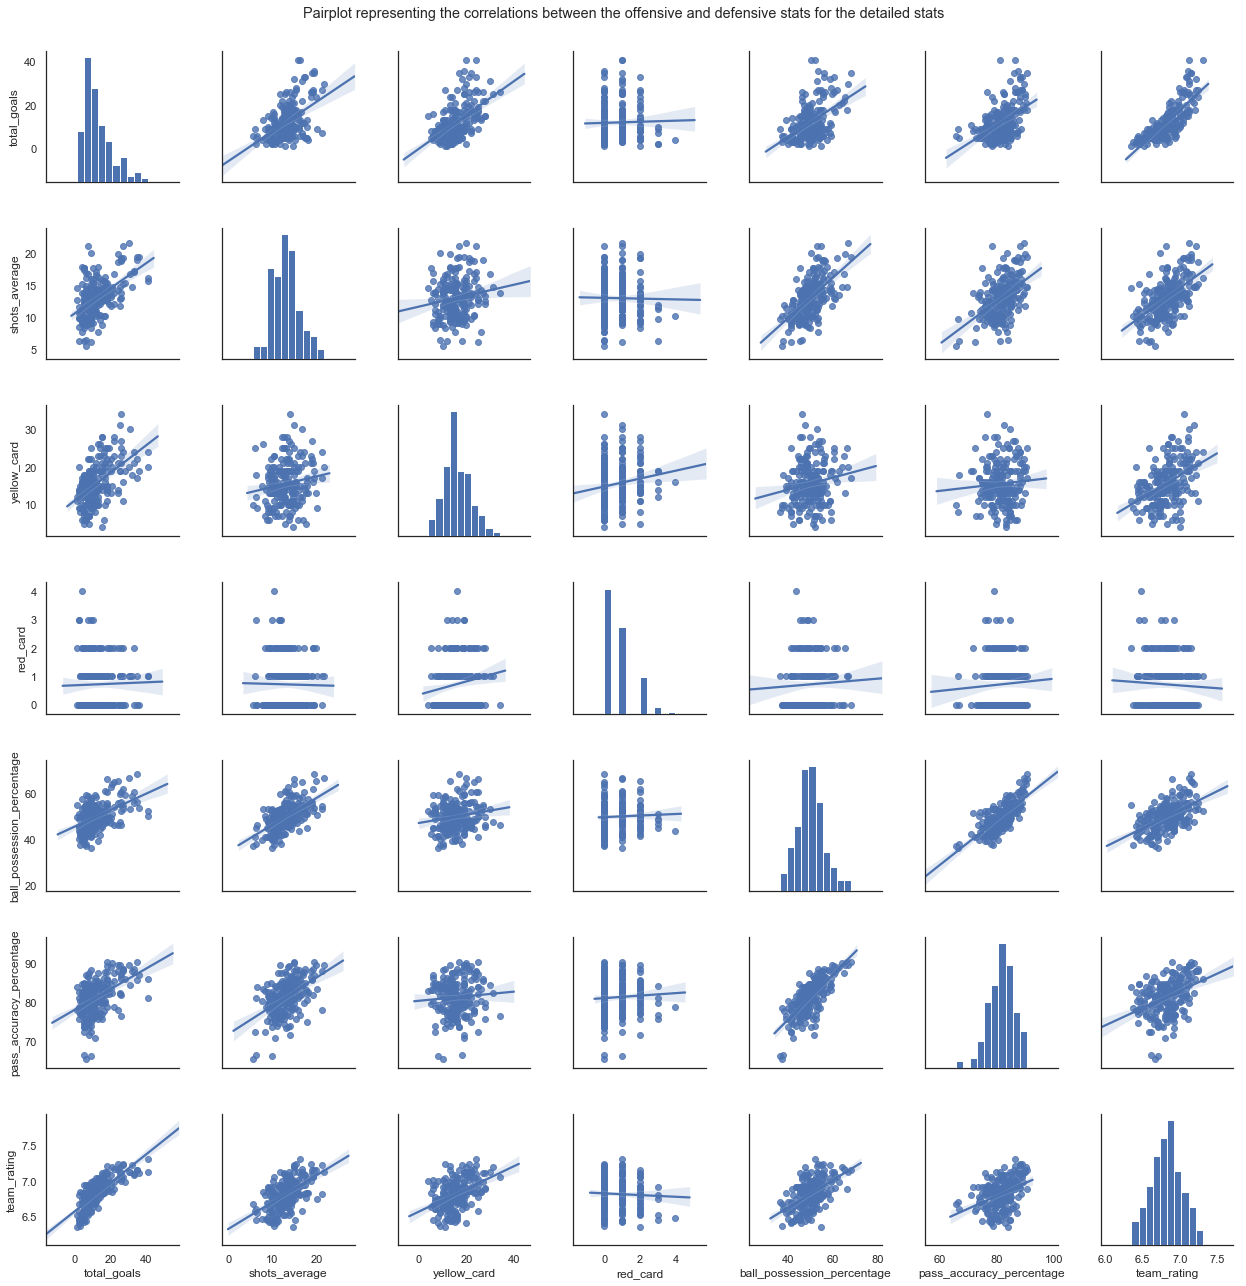

In [92]:
## visualizing pairwise relationships in the subset for the offensive and defensive stats (excluding the team ranking)

off_def_stats_2 = ['total_goals', 'shots_average', 'yellow_card', 'red_card', 'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating']
pair_data = teams_detailed_stats[off_def_stats_2]

sns.pairplot(pair_data, kind = "reg").fig.suptitle("Pairplot representing the correlations between the offensive and defensive stats for the detailed stats", y = 1.02)

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset for the detailed stats')

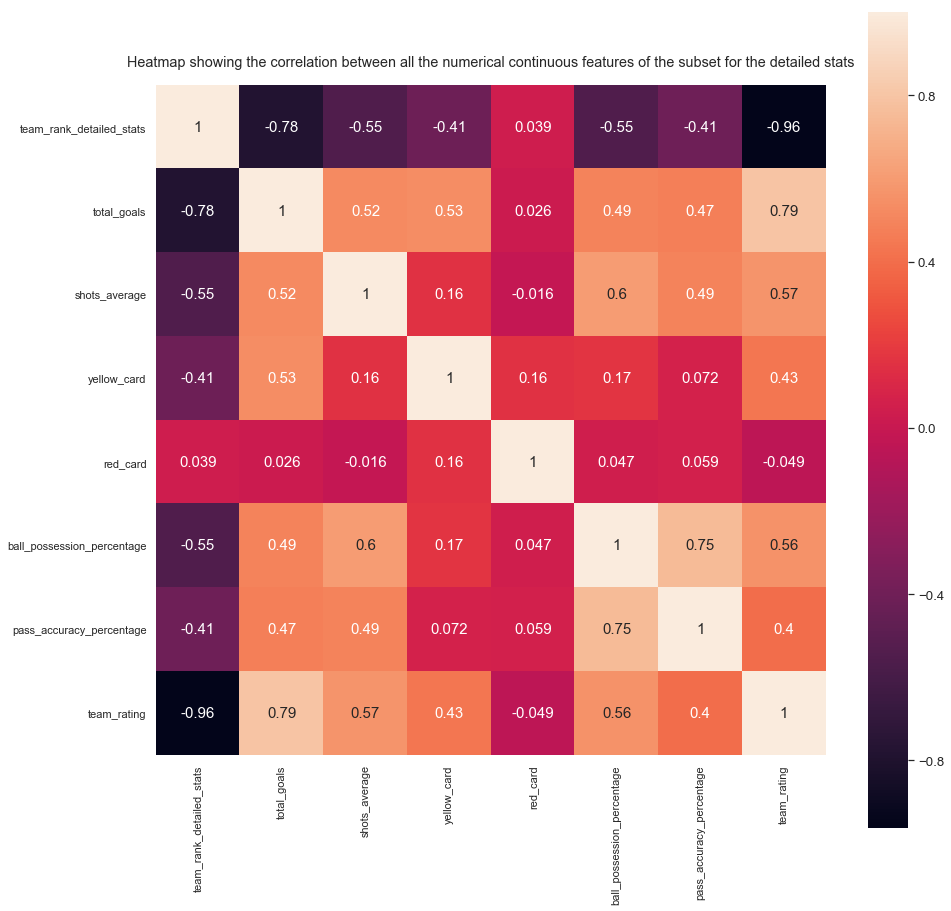

In [151]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient_2 = ['team_rank_detailed_stats', 'total_goals', 'shots_average', 'yellow_card', 'red_card', 'ball_possession_percentage', 
                                        'pass_accuracy_percentage', 'team_rating']

features_hm_2 = teams_detailed_stats[features_coefficient_2]

features_hm_2.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1.2)
sns.heatmap(features_hm_2.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset for the detailed stats', y = 1.02)

##### Quick observations

<i>
    For the detailed stats of each team in the whole competition from the season 2011 to 2018, it seems that :
        - the average total number of goals scored in the competition is 12 (seems a little bit low, this is due to the subset including the group stage, in which bad teams outside of the top 16 of the competition are included, which makes the average value naturally decrease)
        - in average, teams attempt 13 shots per match
        - in average, teams tend to get around 16 yellow cards and 1 red card per season
        - team ball possession average percentage is around 50%
        - team pass accuracy average percentage is around 81.4%
        - team rating (grade given by forecasters) average is around 6.8
        - indeed, around 25% of the teams have less than 6 total goals (the bad teams) and 25% of the teams have more than 14.8 total goals (the good teams)
        - 25% of the teams have a shot average below 12 shots, numbers of yellow cards below 12, red cards below 1, ball possession percentage below 46%, pass accuracy percentage below 79% and a team rating below 6.7 (the bad teams)
        - 25% of the teams have a shot average above 15 shots, numbers of yellow cards above 19, red cards above 1, ball possession percentage above 53.2%, pass accuracy percentage above 84.4% and a team rating above 6.94 (the good teams)
        - 50% of the teams have a shot average around 13, number of yellow cards of 15, red cards of 1, ball possession percentage of 49.6%, pass accuracy percentage of 84.4% and a team rating of 6.82 (the average teams)
</i>

###### For the scorers subset

<i>
    Now, we're going to observe the distribution of the scorers subset in order to detect eventual relationships between the features
</i>

In [94]:
### Overview of the scorers subset

scorers.head()

,year,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,14,1.27
1,2011/12,2,Mario Gomez,Bayern Munich,11,12,1.09
2,2011/12,3,Cristiano Ronaldo,Real Madrid,10,10,1.00
3,2011/12,4,Karim Benzema,Real Madrid,10,7,0.70
4,2011/12,5,Didier Drogba,Chelsea,8,6,0.75


In [95]:
### Converting the type of scorer_rank to integer (currently in object)

scorers['scorer_rank'] = scorers['scorer_rank'].astype('int64')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
### For all of the scorers performances in the whole competition

scorers.describe()

,scorer_rank,scorer_match_played,goals_numbers,goals_ratio
count,210.000000,210.000000,210.000000,210.000000
mean,12.438095,8.847619,5.004762,0.577714
std,6.878889,2.139986,2.544339,0.249226
min,1.000000,4.000000,3.000000,0.230000
25%,6.000000,7.000000,3.000000,0.380000
50%,13.000000,9.000000,4.000000,0.500000
75%,17.000000,10.000000,5.750000,0.710000
max,28.000000,13.000000,17.000000,1.550000


In [97]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib_3(feature, title):
    sns.set(style = "white", palette = "pastel")
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=True, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

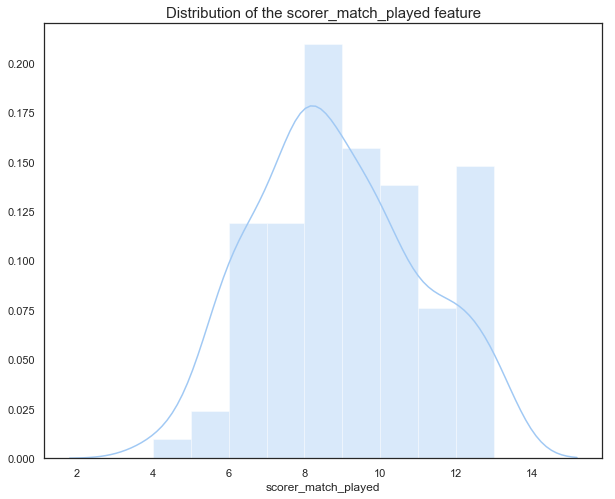

In [98]:
### Checking the distribution of scorer_match_played feature

feat_11 = scorers["scorer_match_played"]

distrib_3(feat_11, "Distribution of the scorer_match_played feature")

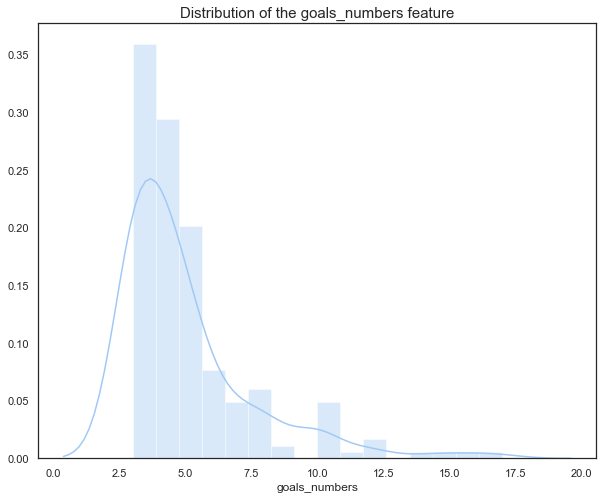

In [99]:
### Checking the distribution of goals_numbers feature

feat_12 = scorers["goals_numbers"]

distrib_3(feat_12, "Distribution of the goals_numbers feature")

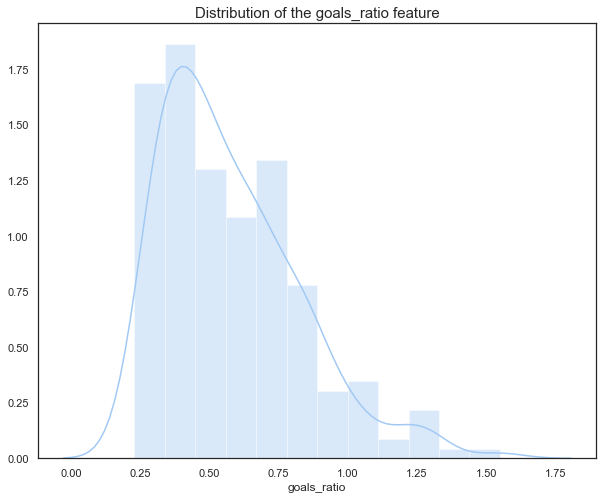

In [100]:
### Checking the distribution of goals_ratio feature

feat_13 = scorers["goals_ratio"]

distrib_3(feat_13, "Distribution of the goals_ratio feature")

Text(0.5,1.02,'Pairplot representing the correlations in the scorers subsets')

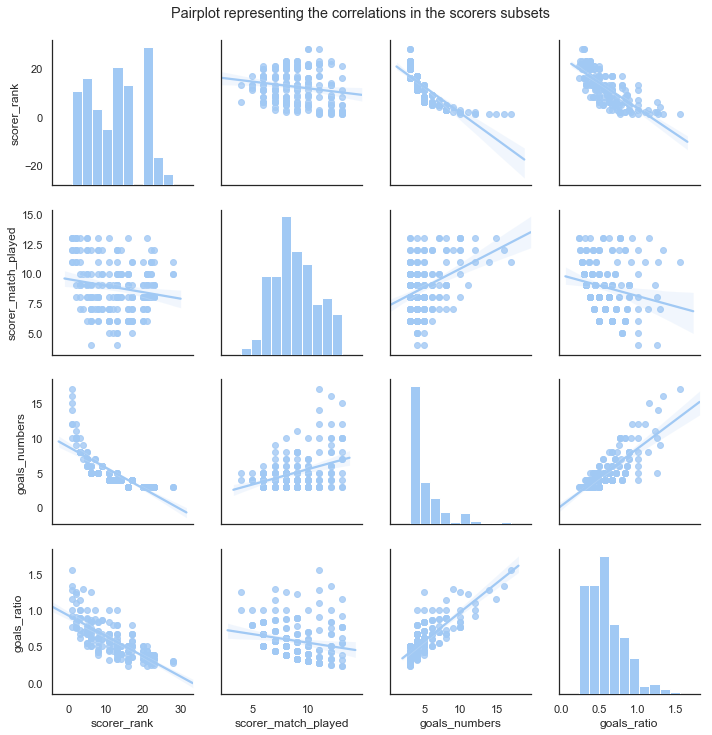

In [101]:
## visualizing pairwise relationships in the scorers subset in order to discover the patterns
## for this subset, we directly create a pairplot because we don't have a lot of features, so it makes to directly view everything at the same time

off_def_stats_3 = ['scorer_rank', 'scorer_match_played', 'goals_numbers', 'goals_ratio']
pair_data = scorers[off_def_stats_3]

sns.pairplot(pair_data, kind = "reg").fig.suptitle("Pairplot representing the correlations in the scorers subsets", y = 1.02)

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset for the scorers')

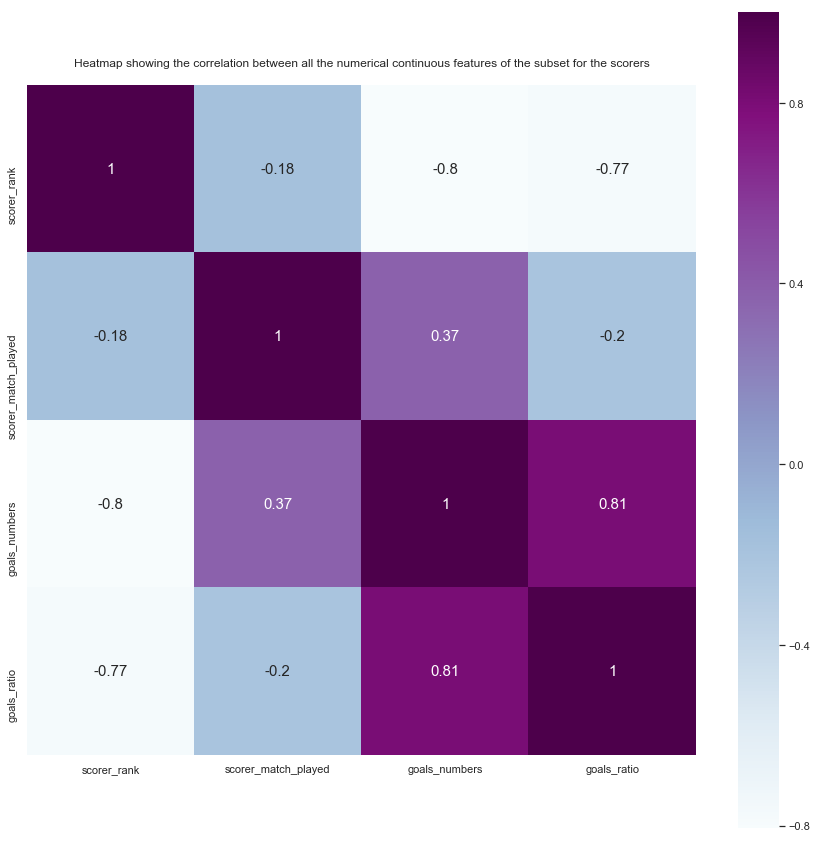

In [102]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient_3 = off_def_stats_3

features_hm_3 = scorers[features_coefficient_3]

features_hm_3.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1)
sns.heatmap(features_hm_3.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, cmap = "BuPu", ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset for the scorers', y = 1.02)

##### Quick observations

<i>
    Here, from 2011 to 2018, we can enhance among the scorers that :
        - in average, they play around 9 matchs per season
        - the goals average is 5 goals per season
        - the goal ratio average is 0.58
        - 25% of the scorers have less than 7 matches played, 3 goals scored and a goal ratio of 0.38 (the worst strikers there; it's not necessaraly a bad stat as it can whether concern players which roles are scoring goals or player whose main role is to keep the goal or to defend the field)
        - 25% of the scorers have more than 10 matches played, 6 goals scored and a goal ratio of 0.71 (here, it concerns mostly the strikers)
        - 50% of the scorers have 9 matches, 4 goals scored and a goal ratio of 0.5
</i>

###### For the assists subset

<i>
    We're going to observe the distribution of the features in the assists subset in order to discover eventual correlations between its features
</i>

In [103]:
### Overview of the subset assists

assists.head()

,year,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,2,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,2,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,2,Kaká,Real Madrid,7,5,0.71


In [104]:
### Converting the type of scorer_rank to integer (currently in object)

assists['assist_rank'] = assists['assist_rank'].astype('int64')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
## For all of the assists players performances in the whole competition

assists.describe()

,assist_rank,assist_match_played,assists_numbers,assists_ratio
count,210.000000,210.000000,210.000000,210.000000
mean,10.447619,9.542857,3.100000,0.344524
std,7.096034,2.102760,1.191878,0.157060
min,1.000000,3.000000,2.000000,0.150000
25%,4.000000,8.000000,2.000000,0.220000
50%,7.500000,10.000000,3.000000,0.330000
75%,16.000000,11.000000,4.000000,0.430000
max,24.000000,13.000000,9.000000,1.000000


In [106]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib_4(feature, title):
    sns.set(style = "white", palette = "bright")
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=True, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

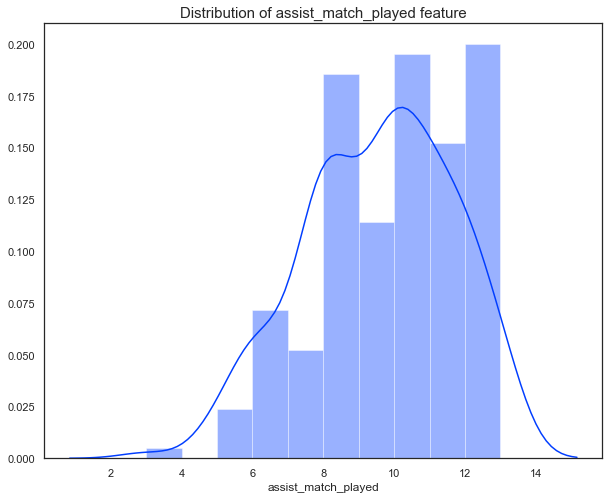

In [107]:
### Distribution of assist_match_played feature

feat_21 = assists['assist_match_played']

distrib_4(feat_21, "Distribution of assist_match_played feature")

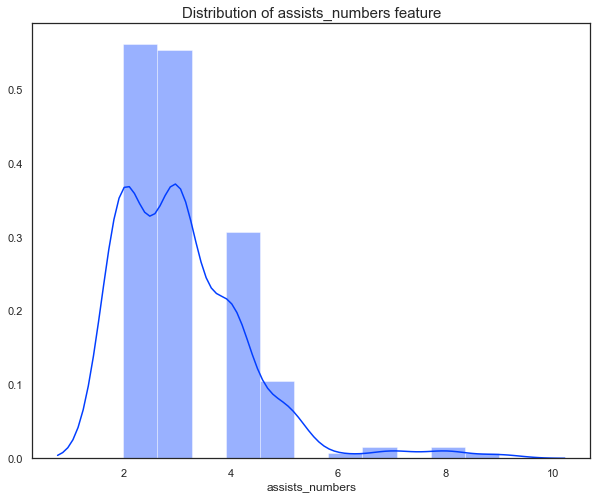

In [108]:
### Distribution of assists_numbers feature

feat_22 = assists['assists_numbers']

distrib_4(feat_22, "Distribution of assists_numbers feature")

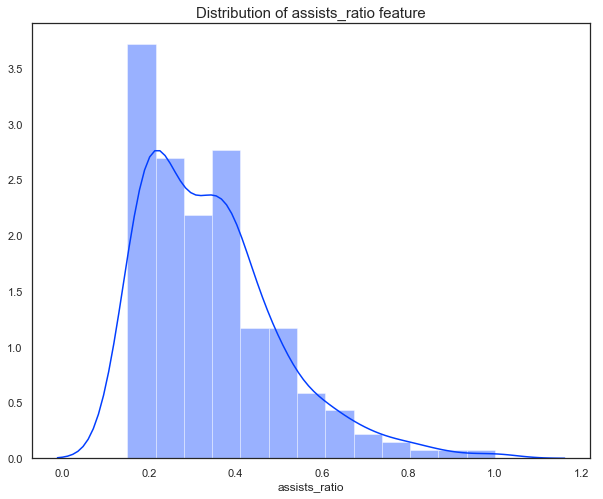

In [109]:
### Distribution of assists_ratio feature

feat_23 = assists['assists_ratio']

distrib_4(feat_23, "Distribution of assists_ratio feature")

Text(0.5,1.02,'Pairplot representing the correlations in the assists subset')

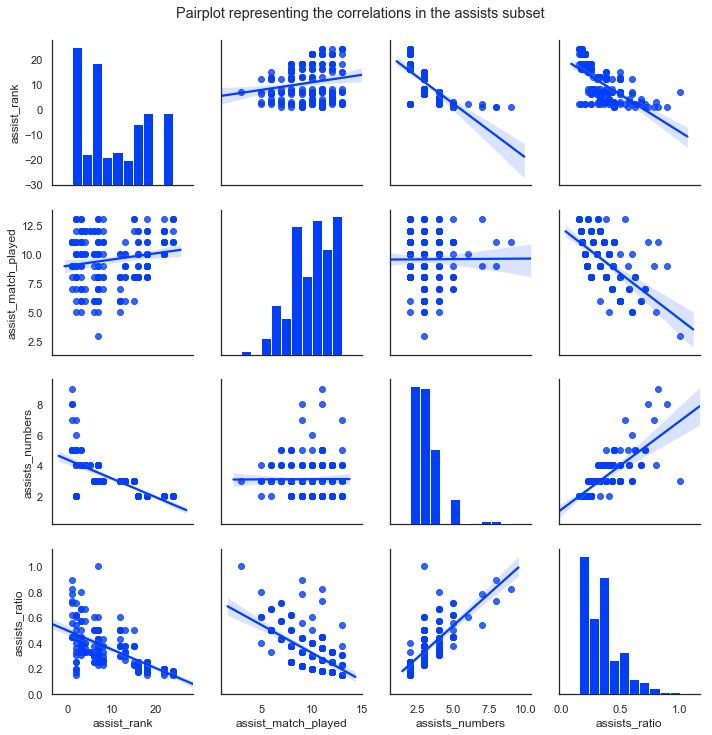

In [110]:
## visualizing pairwise relationships in the assists subset in order to discover the patterns
## for this subset, we directly create a pairplot because we don't have a lot of features, so it makes to directly view everything at the same time

off_def_stats_4 = ['assist_rank', 'assist_match_played', 'assists_numbers', 'assists_ratio']
pair_data_4 = assists[off_def_stats_4]

sns.pairplot(pair_data_4, kind = "reg").fig.suptitle("Pairplot representing the correlations in the assists subset", y = 1.02)

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset for the assists')

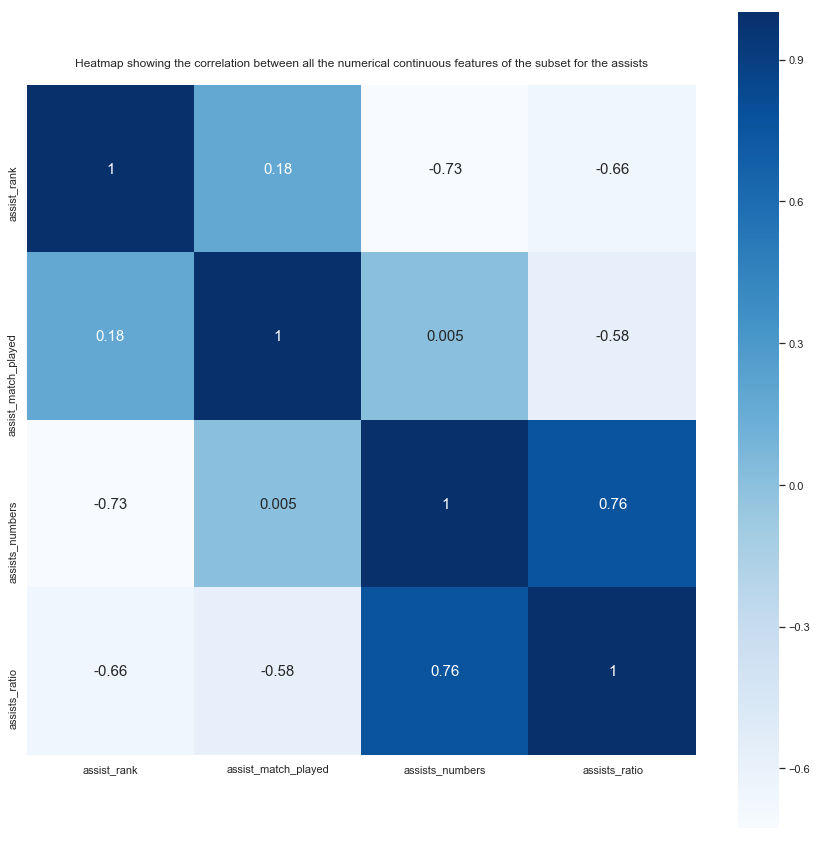

In [111]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient_4 = off_def_stats_4

features_hm_4 = assists[features_coefficient_4]

features_hm_4.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1)
sns.heatmap(features_hm_4.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, cmap = "Blues", ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset for the assists', y = 1.02)

##### Quick Observations

<i>
Here, from 2011 to 2018, we can enhance among the assists player that :

    - in average, they play around 9 matchs per season
    - the assist average is 3 assists per season
    - the assist ratio average is 0.34
    - 25% of the assists players have less than 8 matches played, 2 assists made and an assist ratio of 0.22 (the worst assists players there; it's not necessaraly a bad stat as it can whether concern players which roles are making assists or player whose main role is to keep the goal or to defend the field)
    - 25% of the assists players have more than 11 matches played, 4 assists made and an assist ratio of 0.43 (here, it concerns mostly the players in assisting)
    - 50% of the assists players have 9 matches, 10 assists made and an assist ratio of 0.33
</i>

###### Advanced analysis

<i>
    In this part, we want to answer graphically some more advanced questions such as :
        - how is each winner playing ?
        - differences between the winners of the competition and the other teams, their playstyles differences and their nationalities 
        - differences between the losers of the competition and the other teams, their playstyles differences and their nationalities 
        - number of time a player finished best scorer ? what's his team ? what's his nationality ?
        - number of time a player finished with the most assists ? what's his team ? what's his nationality ?
        - finishing first in the detailed stats = winner ?
        - does the team performance for each round have a BIG influence on his potential victory ?
        - best players role ? (striker, midfielder, defender or goalkeeper ?)
        - does the rating of a team guarantees him the winner spot ?
</i>

In [112]:
#### how is each winner playing ? is finishing first in the detailed stats = winner ?

    ###  1) filtering the teams_round to determine the winner
    ###  2) filtering the teams_detailed_stats to determine the team's playstyle
    ###  3) we are going to join both dataframes in order to have a global view of each winner statistics
    
        ## overview of the teams_round subset
        
teams_round.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,last_results,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,8,WW,42,50,17,83,75,3.75
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,3,DW,50,50,0,92,75,3.66
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,6,LW,38,46,15,92,38,2.85
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,1,LW,38,62,0,83,62,3.47
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,1,WL,40,50,20,80,60,3.00


In [113]:
        ## overview of the teams_detailed_stats
    
teams_detailed_stats.head()

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
1,2011/12,2,Real Madrid,35,19.1,22,1,56.1,85.9,7.15
2,2011/12,3,FC Barcelona,35,19.5,17,0,68.2,90.5,7.15
3,2011/12,4,Bayern Munich,26,19.1,27,1,55.1,86.2,7.11
4,2011/12,5,Valencia CF,12,16.7,11,0,58.5,85.1,7.04


In [115]:
        ## filtering the teams_round subset in order to only extract the winners statistics
    
finals = teams_round[teams_round['round'] == "Finals"] # slicing the subset in order to only obtain the teams that are in the finals
finals

winners = finals[finals['last_results'] == "W"] # slicing the finalists subset in order to only obtain the winners
winners

filt_winners = winners.drop(columns = ['goals_scored', 'goals_conceded', 'goals_difference', 'n_matchs_played', 'n_wins', 'n_draws', 'n_loss', 'last_results', 'round'])
filt_winners

,year,team_rank,team,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
28,2011/12,1,Chelsea,38,62,0,83,62,3.47
58,2012/13,1,Bayern Munich,38,62,8,92,62,3.23
88,2013/14,1,Real Madrid,38,54,8,92,77,3.92
118,2014/15,1,FC Barcelona,46,54,0,85,69,3.23
148,2015/16,1,Real Madrid,77,15,23,69,31,2.62
178,2016/17,1,Real Madrid,8,92,0,100,100,4.15
208,2017/18,1,Real Madrid,23,77,0,100,92,3.77


In [116]:
        ## filtering the teams_detailed_stats subset in order to only extract the winners detailed statistics
        ## indeed, as we know the winners of the previous editions thanks to the filtering made above, we can
        ## directly select them manually from the teams_detailed

                # selecting each winner from the subset individually
            
first_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2011/12") & (teams_detailed_stats["team_names_detailed_stats"] == "Chelsea")]
second_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2012/13") & (teams_detailed_stats["team_names_detailed_stats"] == "Bayern Munich")]
third_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2013/14") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]
fourth_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2014/15") & (teams_detailed_stats["team_names_detailed_stats"] == "FC Barcelona")]
fifth_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2015/16") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]
sixth_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2016/17") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]
seventh_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2017/18") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]

                # creating a dataframe containing only the winners

winners_ds = pd.concat([first_w, second_w, third_w, fourth_w, fifth_w, sixth_w, seventh_w])
winners_ds

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
30,2012/13,1,Bayern Munich,31,16.8,30,1,53.0,84.6,7.12
60,2013/14,1,Real Madrid,41,16.2,24,1,52.1,86.2,7.31
91,2014/15,2,FC Barcelona,32,14.8,18,1,58.6,88.2,7.22
120,2015/16,1,Real Madrid,27,21.2,24,0,54.6,88.2,7.22
150,2016/17,1,Real Madrid,36,19.5,19,0,53.5,87.2,7.11
182,2017/18,3,Real Madrid,33,17.3,21,0,55.8,88.6,7.09


In [144]:
        ## in order to have a global view, we are going to inner join both winners subsets on the team ranking key
 
                # inner joining the dataframes
    
winners_df = pd.merge(filt_winners, winners_ds, on = 'year')
winners_df

                # dropping the columns that we don't want
    
winners_df.drop(columns = ["team_names_detailed_stats", "team_rating"])

                # reorganizing the dataframe

winners_df = winners_df[[
    "year", "team_rank", "team_rank_detailed_stats", "team", "total_goals", "average_goals", "shots_average", "ball_possession_percentage", 
    "pass_accuracy_percentage", "both_teams_to_score", "over_1.5_goals", "over_2.5_goals", "clean_sheets", "fail_to_score",
    "yellow_card", "red_card"
]]

                # we have to slightly modify the name of the team by adding the year next to it due to
                # Real Madrid having won it 4 times in the last 7 years so if we don't want the graphs to mix all the Real Madrid's values,
                # we have to fight a way to distinguish them

winners_df.iloc[2, 3] = "Real Madrid 2013/14"
winners_df.iloc[4, 3] = "Real Madrid 2015/16"
winners_df.iloc[5, 3] = "Real Madrid 2016/17"
winners_df.iloc[6, 3] = "Real Madrid 2017/18"

winners_df

,year,team_rank,team_rank_detailed_stats,team,total_goals,average_goals,shots_average,ball_possession_percentage,pass_accuracy_percentage,both_teams_to_score,over_1.5_goals,over_2.5_goals,clean_sheets,fail_to_score,yellow_card,red_card
0,2011/12,1,1,Chelsea,25,3.47,14.8,47.6,82.5,62,83,62,38,0,31,1
1,2012/13,1,1,Bayern Munich,31,3.23,16.8,53.0,84.6,62,92,62,38,8,30,1
2,2013/14,1,1,Real Madrid 2013/14,41,3.92,16.2,52.1,86.2,54,92,77,38,8,24,1
3,2014/15,1,2,FC Barcelona,32,3.23,14.8,58.6,88.2,54,85,69,46,0,18,1
4,2015/16,1,1,Real Madrid 2015/16,27,2.62,21.2,54.6,88.2,15,69,31,77,23,24,0
5,2016/17,1,1,Real Madrid 2016/17,36,4.15,19.5,53.5,87.2,92,100,100,8,0,19,0
6,2017/18,1,3,Real Madrid 2017/18,33,3.77,17.3,55.8,88.6,77,100,92,23,0,21,0


Text(0,0.5,'Total goals scored')

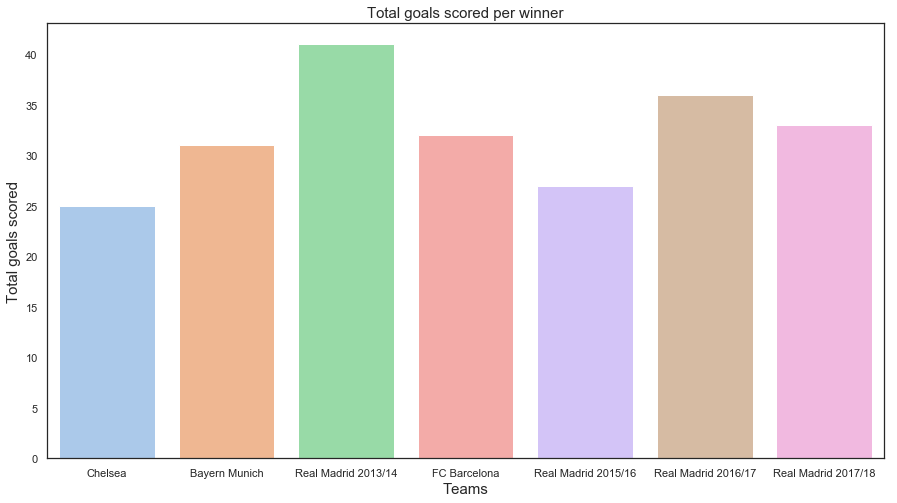

In [146]:
        ## Visualizing the total goals scored per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "total_goals", data = winners_df, ci = None, ax = ax)# creating the barplot 
plt.title("Total goals scored per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Total goals scored", fontsize = 15)

Text(0,0.5,'Average goal ratio')

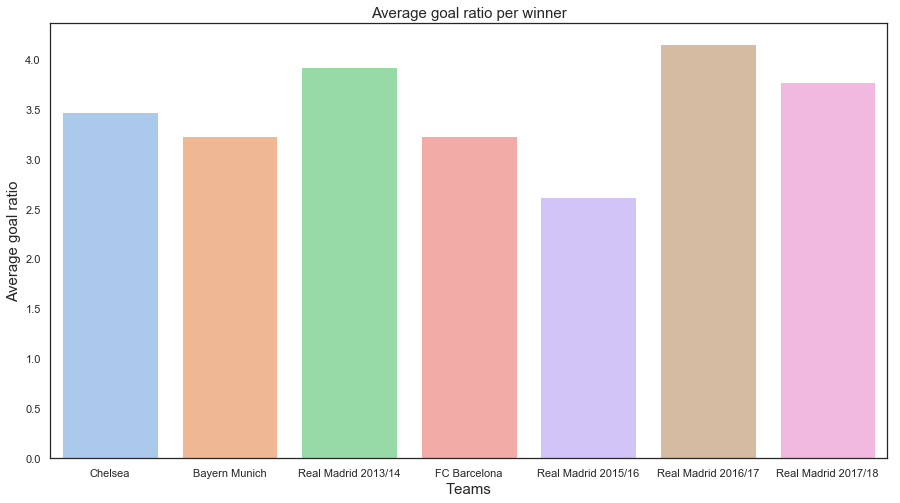

In [149]:
        ## Visualizing the average goal ratio per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "average_goals", data = winners_df, ci = None, ax = ax)# creating the barplot 
plt.title("Average goal ratio per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Average goal ratio", fontsize = 15)

Text(0,0.5,'Shots average attempts')

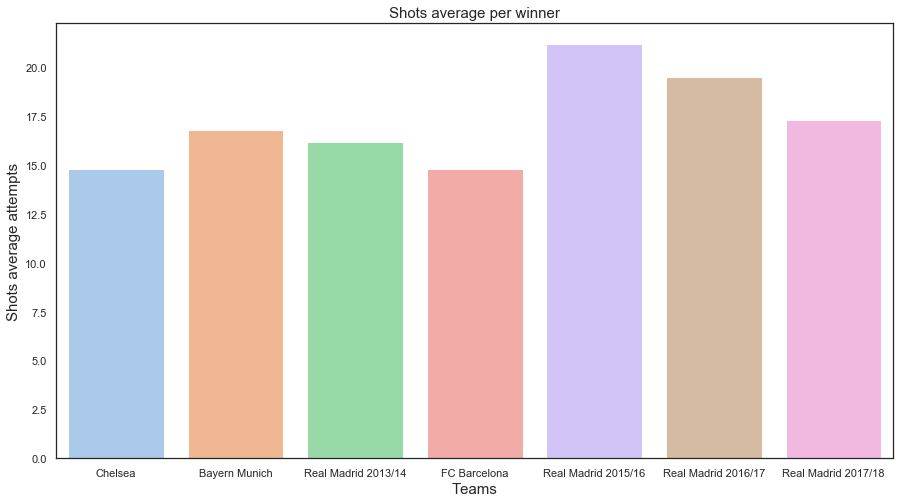

In [153]:
        ## Visualizing the shots average per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "shots_average", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Shots average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Shots average attempts", fontsize = 15)

Text(0,0.5,'Ball possession percentage average')

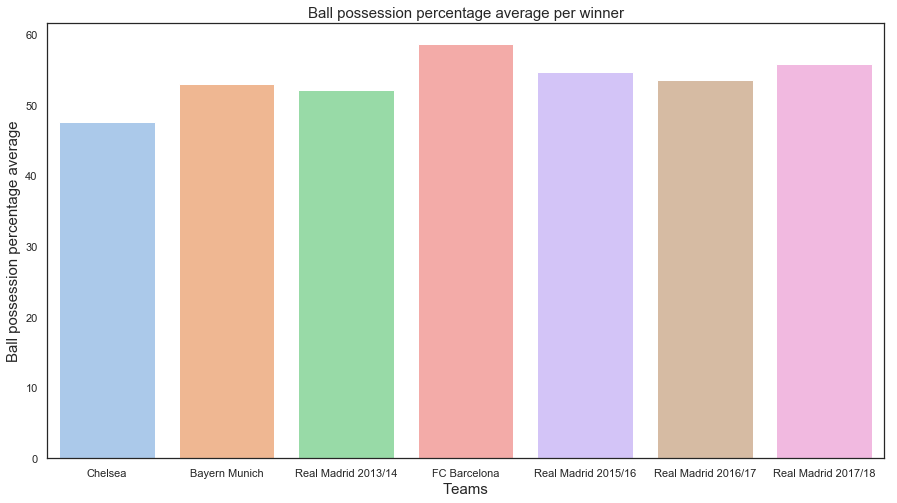

In [154]:
        ## Visualizing the ball possession percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "ball_possession_percentage", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Ball possession percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Ball possession percentage average", fontsize = 15)

Text(0,0.5,'Pass accuracy percentage average')

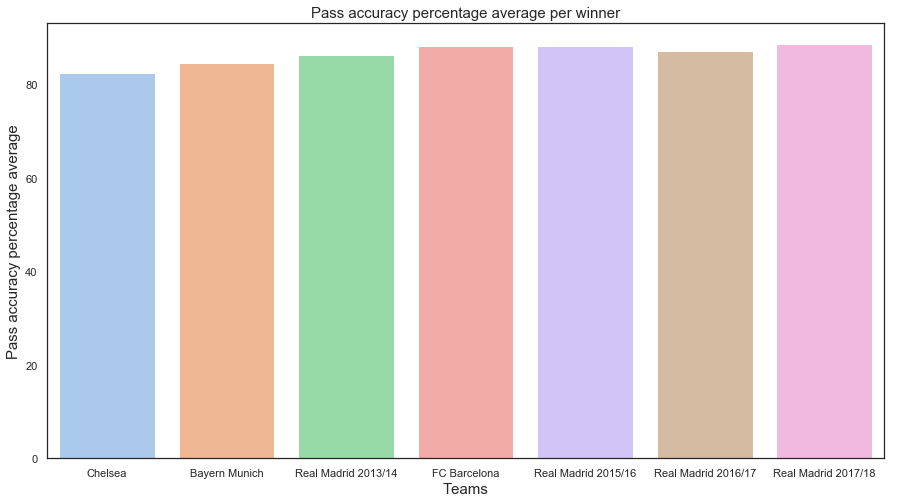

In [155]:
        ## Visualizing the pass accuracy percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "pass_accuracy_percentage", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Pass accuracy percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Pass accuracy percentage average", fontsize = 15)

Text(0,0.5,'both_teams_to_score percentage average')

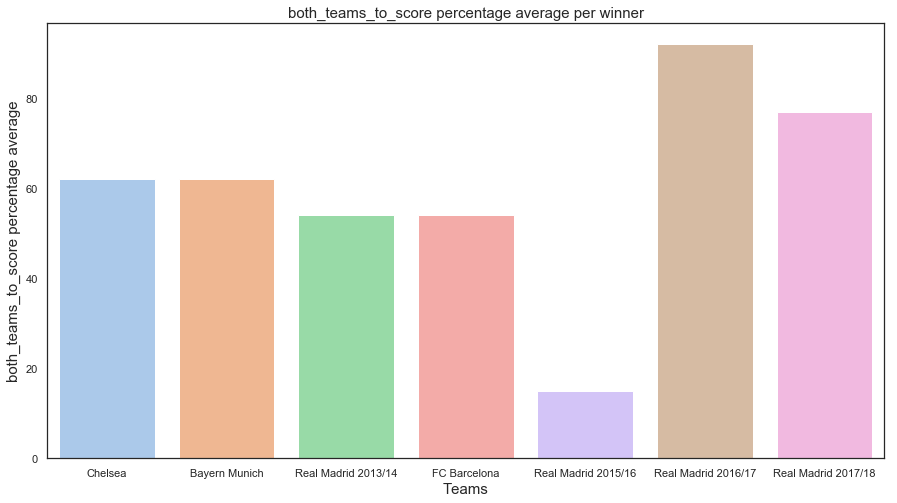

In [156]:
        ## Visualizing the both_teams_to_score percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "both_teams_to_score", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("both_teams_to_score percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("both_teams_to_score percentage average", fontsize = 15)

Text(0,0.5,'over_1.5_goals percentage average')

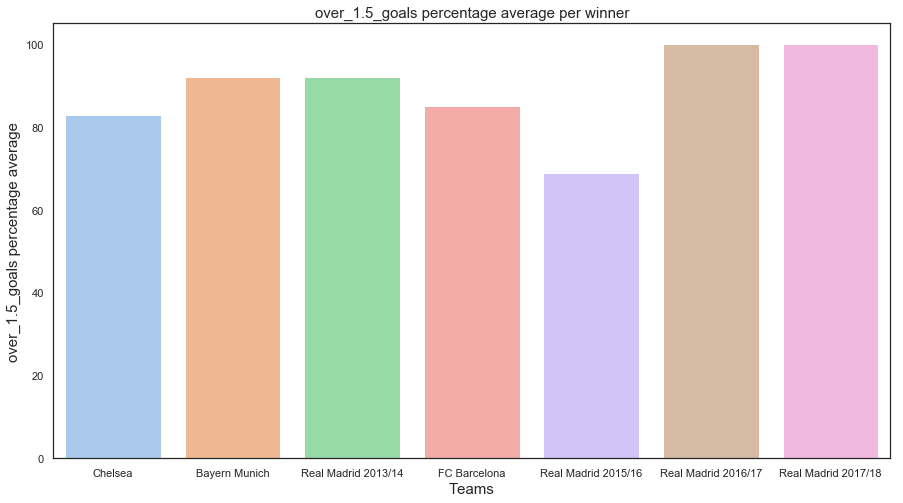

In [157]:
        ## Visualizing the over_1.5_goals percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "over_1.5_goals", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("over_1.5_goals percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("over_1.5_goals percentage average", fontsize = 15)

Text(0,0.5,'over_2.5_goals percentage average')

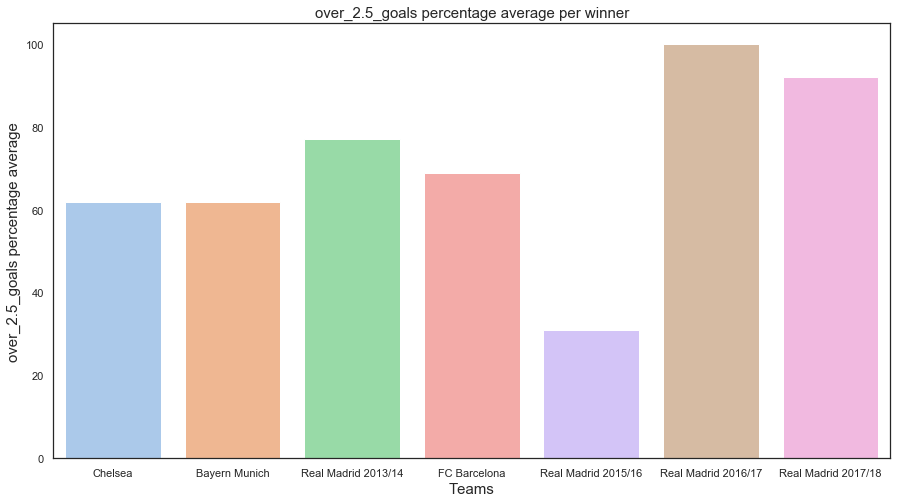

In [158]:
        ## Visualizing the over_2.5_goals percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "over_2.5_goals", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("over_2.5_goals percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("over_2.5_goals percentage average", fontsize = 15)

Text(0,0.5,'Clean_sheets percentage average')

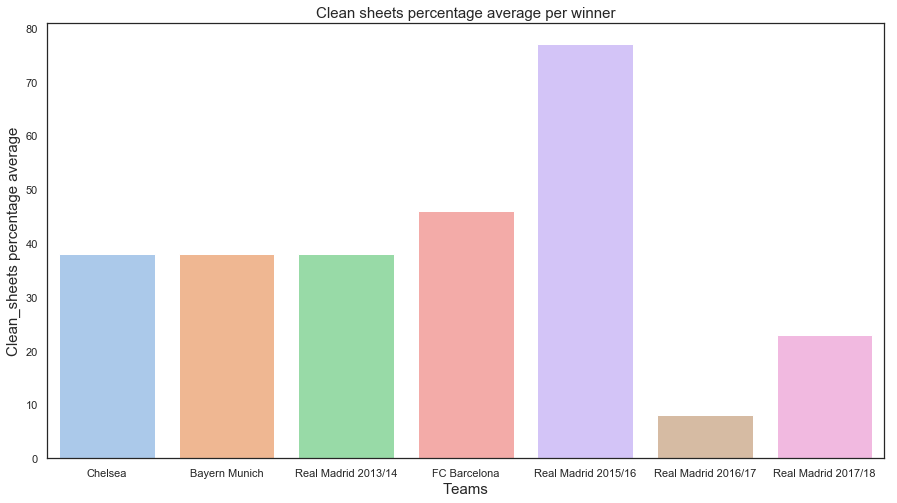

In [159]:
        ## Visualizing the clean sheets percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "clean_sheets", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Clean sheets percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Clean_sheets percentage average", fontsize = 15)

Text(0,0.5,'fail_to_score percentage average')

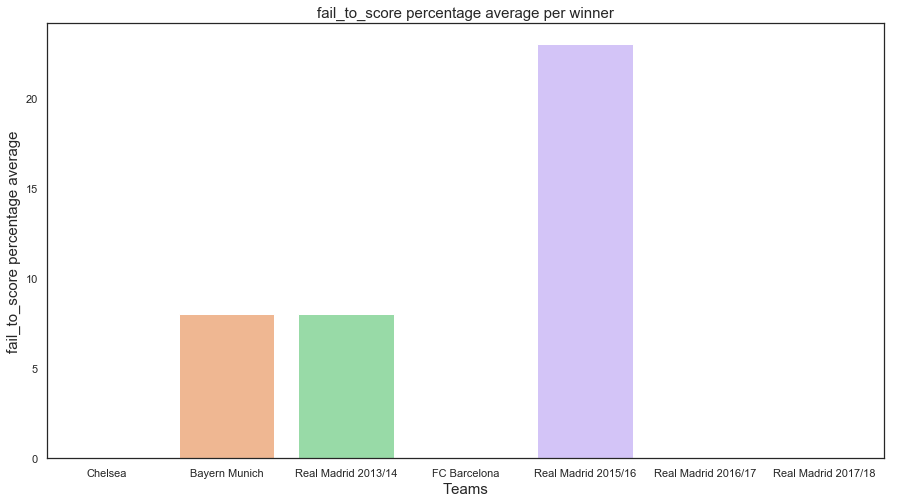

In [160]:
        ## Visualizing the fail_to_score percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "fail_to_score", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("fail_to_score percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("fail_to_score percentage average", fontsize = 15)

Text(0,0.5,'Number of yellow cards')

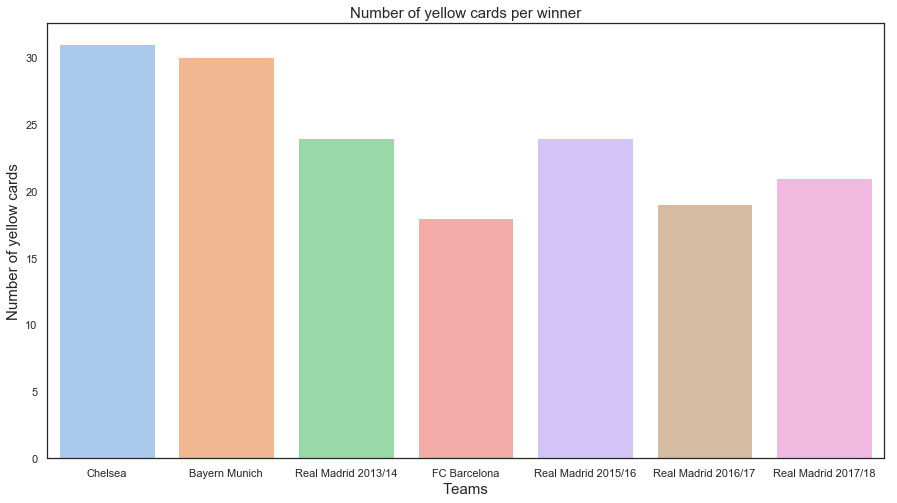

In [162]:
        ## Visualizing the number of yellow cards per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "yellow_card", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Number of yellow cards per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Number of yellow cards", fontsize = 15)

Text(0,0.5,'Number of red cards')

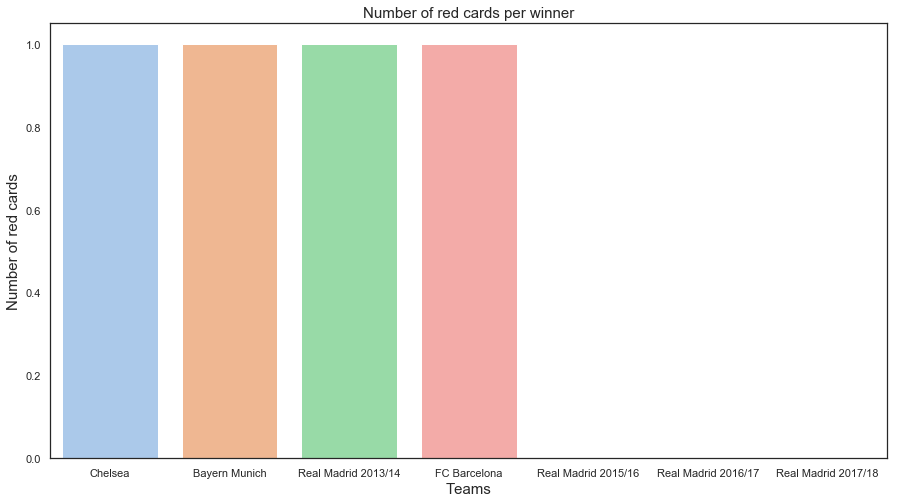

In [163]:
        ## Visualizing the number of yellow cards per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "red_card", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Number of red cards per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Number of red cards", fontsize = 15)